In [1]:
#Execute this cell if have problem with relative import
#.
import sys; sys.path.insert(0, '..')

In [2]:
from pprint import pprint

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pit_df = pd.read_csv("../Data/Corpus_csv/pitchers_all_career.csv")

In [4]:
pit_df.head()

Id         Name  Active  First year  Last year  \
0  Jay_Aldrich_192  Jay Aldrich   False        1987       1990   
1   A.J._Achter_52  A.J. Achter   False        2014       2016   
2   A.J._Alexy_214   A.J. Alexy    True        2021       2021   
3  Aaron_Ashby_601  Aaron Ashby    True        2021       2022   
4  Abe_Alvarez_329  Abe Alvarez   False        2004       2006   

                                                 Url Country Bat hand  \
0  https://www.baseball-reference.com//players/a/...      us    Right   
1  https://www.baseball-reference.com//players/a/...      us    Right   
2  https://www.baseball-reference.com//players/a/...      us    Right   
3  https://www.baseball-reference.com//players/a/...      us    Right   
4  https://www.baseball-reference.com//players/a/...      us     Left   

  Throw hand            Full Name  HoF HoF type HoF year HoF comittee  \
0      Right   Jay Robert Aldrich    0        -        -            -   
1      Right   Adam Joseph Achter    0        -        -            -   
2      Right      Adam John Alexy    0        -        -            -   
3       Left  Aaron Phillip Ashby    0        -        -            -   
4       Left      Abraham Alvarez    0        -        -            -   

   Player type retirement_age  total_seasons    career_teams career_leagues  \
0            1             29              3  ['MIL', 'BAL']   ['AL', 'NL']   
1            1             27              3  ['MIN', 'LAA']         ['AL']   
2            1             23              1         ['TEX']         ['AL']   
3            1             24              2         ['MIL']         ['NL']   
4            1             23              3         ['BOS']         ['AL']   

  first_position second_position  play_in_mayors  play_in_negro_league  \
0              P               -               1                     0   
1              P               -               1                     0   
2              P               -               1                     0   
3              P               -               1                     0   
4              P               -               1                     0   

   two_way_player  debut_decade  retirament_decade  W_pt  L_pt  W-L%_pt  \
0               0          1980               1990   6.0   5.0    0.545   
1               0          2010               2010   2.0   1.0    0.667   
2               0          2020               2020   3.0   1.0    0.750   
3               0          2020               2020   3.0   5.0    0.375   
4               0          2000               2000   0.0   1.0    0.000   

   ERA_pt  G_pt  GS_pt  GF_pt  CG_pt  SHO_pt  SV_pt  IP_pt   H_pt  R_pt  \
0    4.72  62.0    0.0   21.0    0.0     0.0    2.0  108.2  119.0  62.0   
1    3.92  45.0    0.0   22.0    0.0     0.0    0.0   62.0   69.0  30.0   
2    4.70   5.0    4.0    0.0    0.0     0.0    0.0   23.0   13.0  12.0   
3    3.70  23.0    8.0    5.0    0.0     0.0    2.0   65.2   51.0  35.0   
4   11.32   4.0    1.0    1.0    0.0     0.0    0.0   10.1   19.0  13.0   

   ER_pt  HR_pt  BB_pt  IBB_pt  SO_pt  HBP_pt  BK_pt  WP_pt  BF_pt  ERA+_pt  \
0   57.0   12.0   39.0     9.0   46.0     3.0    2.0    3.0  474.0     90.0   
1   27.0   13.0   21.0     2.0   33.0     1.0    0.0    0.0  267.0    104.0   
2   12.0    4.0   17.0     0.0   17.0     1.0    0.0    0.0   97.0     95.0   
3   27.0    6.0   32.0     0.0   78.0     2.0    0.0    3.0  281.0    113.0   
4   13.0    5.0    7.0     0.0    5.0     0.0    0.0    0.0   53.0     46.0   

   FIP_pt  WHIP_pt  H9_pt  HR9_pt  BB9_pt  SO9_pt  SO/W_pt  RAA_pt  WAA_pt  \
0    4.57    1.454    9.9     1.0     3.2     3.8     1.18    -7.0    -0.7   
1    5.87    1.452   10.0     1.9     3.0     4.8     1.57    -2.0    -0.3   
2    6.30    1.304    5.1     1.6     6.7     6.7     1.00    -1.0    -0.1   
3    3.52    1.264    7.0     0.8     4.4    10.7     2.44    -6.0    -0.6   
4   10.43    2.516   16.5     4.4     6.1     4.4     

In [5]:
pit_df.shape

(10157, 60)

In [6]:
from Preprocessing.data_keys import headers_bio, headers_pit

In [7]:
from Preprocessing.data_frame_procces import filter_dataset, select_features

In [8]:
pit_df['retirement_age'] = (
        pit_df['retirement_age'].replace('desconocido', pit_df['retirement_age'].mode()[0])
    )
pit_df['retirement_age'] = pit_df['retirement_age'].astype('int64')

In [9]:
gt_conditions = {
    "total_seasons":10,
    'G_pt':150,
}
eq_conditions = {
    "HoF type":['-','Player']
}
filter_df = filter_dataset(pit_df, eq_conditions,gt_conditions, None, None)

In [10]:
filter_df.shape

(1418, 60)

In [11]:
for h in headers_pit:
    nan = filter_df[h].isna().any()
    if nan:
        print(f"{h}:{nan} --->{filter_df[h].isna().sum()}")
        #print(f"{h}:{bat_df[h].isna().sum()}")

IBB_pt:True --->128
HBP_pt:True --->1


In [12]:
print(filter_df['HoF'].value_counts())

0    1339
1      79
Name: HoF, dtype: int64


In [13]:
inactives_cond = {"Active":[False]}
inactive_pit_df = filter_dataset(filter_df, inactives_cond, None, None, None) 

In [14]:
inactive_pit_df.shape

(1325, 60)

In [15]:
print(inactive_pit_df['HoF'].value_counts())

0    1246
1      79
Name: HoF, dtype: int64


In [16]:
negro_league_condition = {
    'play_in_negro_league':[1]
}
negro_lg_pit_df = filter_dataset(filter_df, negro_league_condition, None, None, None)

In [17]:
negro_lg_pit_df.shape

(25, 60)

In [18]:
negro_lg_pit_df.describe()

First year    Last year       HoF  Player type  retirement_age  \
count    25.000000    25.000000  25.00000         25.0        25.00000   
mean   1928.120000  1945.520000   0.24000          1.0        38.80000   
std       7.886275     9.142939   0.43589          0.0         5.09902   
min    1920.000000  1931.000000   0.00000          1.0        33.00000   
25%    1922.000000  1939.000000   0.00000          1.0        35.00000   
50%    1926.000000  1945.000000   0.00000          1.0        39.00000   
75%    1931.000000  1948.000000   0.00000          1.0        40.00000   
max    1947.000000  1965.000000   1.00000          1.0        58.00000   

       total_seasons  play_in_mayors  play_in_negro_league  two_way_player  \
count      25.000000       25.000000                  25.0            25.0   
mean       13.800000        0.280000                   1.0             0.4   
std         2.415229        0.458258                   0.0             0.5   
min        11.000000        0.000000                   1.0             0.0   
25%        12.000000        0.000000                   1.0             0.0   
50%        13.000000        0.000000                   1.0             0.0   
75%        14.000000        1.000000                   1.0             1.0   
max        21.000000        1.000000                   1.0             1.0   

       debut_decade  retirament_decade       W_pt        L_pt    W-L%_pt  \
count     25.000000          25.000000   25.00000   25.000000  25.000000   
mean    1924.800000        1939.600000   84.32000   60.680000   0.573040   
std        7.702813           9.780934   29.66721   16.920697   0.091082   
min     1920.000000        1930.000000   40.00000   36.000000   0.360000   
25%     1920.000000        1930.000000   60.00000   52.000000   0.507000   
50%     1920.000000        1940.000000   74.00000   56.000000   0.586000   
75%     1930.000000        1940.000000  110.00000   66.000000   0.642000   
max     1940.000000        1960.000000  153.00000  104.000000   0.729000   

          ERA_pt        G_pt       GS_pt      GF_pt       CG_pt     SHO_pt  \
count  25.000000   25.000000   25.000000   25.00000   25.000000  25.000000   
mean    3.613600  220.760000  145.680000   28.40000   87.960000  10.600000   
std     0.542516   65.625376   47.617154   27.57112   30.552523   7.314369   
min     2.630000  153.000000   59.000000    4.00000   29.000000   2.000000   
25%     3.330000  174.000000  116.000000   14.00000   66.000000   6.000000   
50%     3.710000  205.000000  134.000000   22.00000   81.000000   8.000000   
75%     3.980000  238.000000  158.000000   26.00000  113.000000  15.000000   
max     4.840000  398.000000  305.000000  114.00000  145.000000  31.000000   

           SV_pt        IP_pt         H_pt         R_pt       ER_pt  \
count  25.000000    25.000000    25.000000    25.000000   25.000000   
mean   10.920000  1263.724000  1235.760000   626.640000  498.800000   
std     9.367141   342.686643   314.262136   137.176553  124.682931   
min     2.000000   806.000000   761.000000   394.000000  296.000000   
25%     5.000000   985.200000  1031.000000   560.000000  438.000000   
50%     8.000000  1184.000000  1239.000000   606.000000  477.000000   
75%    12.000000  1499.200000  1381.000000   652.000000  521.000000   
max    44.000000  2251.200000  2188.000000  1007.000000  893.000000   

            HR_pt       BB_pt     IBB_pt        SO_pt     HBP_pt      BK_pt  \
count   25.000000   25.000000  22.000000    25.000000  25.000000  25.000000   
mean    49.120000  374.480000   6.409091   692.200000  28.680000   0.840000   
std     50.996993  123.852103  13.153522   288.676001  11.852285   1.247664   
min     12.000000  184.000000   0.000000   380.000000   9.000000   0.000000   
25%     22.000000  291.000000   0.000000   483.000000  20.000000   0.000000   
50%     36.000000  357.000000   0.000000   625.000000  28.000000   0.000000   
75%     51.000000  402.000000   1.750000   719.000000  36

In [19]:
negro_lg_pit_df['HoF'].value_counts()

0    19
1     6
Name: HoF, dtype: int64

In [20]:
mayor_league_condition = {
    'play_in_mayors':[1]
}
mL_gt_cond = {
    'WAR_pt':15
}


mayors_lg_pit_df = filter_dataset(filter_df, mayor_league_condition, mL_gt_cond, None, None)


In [21]:
mayors_lg_pit_df.shape

(698, 60)

In [22]:
drop_recent_election_cond = {
    'retirament_decade':2009
}
inactive_mayors_lg_pit_df = filter_dataset(inactive_pit_df, mayor_league_condition, mL_gt_cond, drop_recent_election_cond, None)

In [23]:
inactive_mayors_lg_pit_df.shape

(579, 60)

In [24]:
inactive_mayors_lg_pit_df.describe()

First year    Last year         HoF  Player type  retirement_age  \
count   579.000000   579.000000  579.000000        579.0      579.000000   
mean   1949.238342  1963.526770    0.122625          1.0       36.500864   
std      32.134964    32.599232    0.328290          0.0        3.768553   
min    1871.000000  1884.000000    0.000000          1.0       28.000000   
25%    1924.000000  1938.000000    0.000000          1.0       34.000000   
50%    1956.000000  1970.000000    0.000000          1.0       36.000000   
75%    1977.000000  1991.000000    0.000000          1.0       39.000000   
max    1998.000000  2009.000000    1.000000          1.0       58.000000   

       total_seasons  play_in_mayors  play_in_negro_league  two_way_player  \
count     579.000000           579.0            579.000000      579.000000   
mean       14.499136             1.0              0.008636        0.081174   
std         3.350037             0.0              0.092606        0.273339   
min        10.000000             1.0              0.000000        0.000000   
25%        12.000000             1.0              0.000000        0.000000   
50%        14.000000             1.0              0.000000        0.000000   
75%        16.000000             1.0              0.000000        0.000000   
max        27.000000             1.0              1.000000        1.000000   

       debut_decade  retirament_decade        W_pt        L_pt     W-L%_pt  \
count    579.000000         579.000000  579.000000  579.000000  579.000000   
mean    1944.663212        1958.791019  148.834197  125.642487    0.536228   
std       32.090091          32.463813   65.768811   46.436864    0.053799   
min     1870.000000        1880.000000   35.000000   30.000000    0.372000   
25%     1920.000000        1930.000000  104.000000   94.000000    0.502000   
50%     1950.000000        1970.000000  133.000000  117.000000    0.533000   
75%     1970.000000        1990.000000  184.000000  150.000000    0.568000   
max     1990.000000        2000.000000  511.000000  315.000000    0.717000   

           ERA_pt         G_pt       GS_pt       GF_pt       CG_pt  \
count  579.000000   579.000000  579.000000  579.000000  579.000000   
mean     3.494352   469.333333  297.728843  102.333333  120.754750   
std      0.502592   171.723387  145.556089  142.963365  109.904025   
min      1.820000   153.000000    0.000000    0.000000    0.000000   
25%      3.185000   348.500000  223.500000   22.500000   44.000000   
50%      3.540000   424.000000  292.000000   53.000000   89.000000   
75%      3.830000   550.500000  372.000000  103.000000  170.500000   
max      4.990000  1252.000000  815.000000  802.000000  749.000000   

           SHO_pt       SV_pt        IP_pt         H_pt         R_pt  \
count  579.000000  579.000000   579.000000   579.000000   579.000000   
mean    19.476684   33.614853  2406.444560  2341.571675  1103.164076   
std     14.433623   68.336349   963.344149   936.713551   462.416171   
min      0.000000    0.000000   708.200000   479.000000   252.000000   
25%      9.000000    3.500000  1757.650000  1699.500000   805.000000   
50%     17.000000   10.000000  2191.200000  2188.000000  1012.000000   
75%     27.000000   25.000000  2865.550000  2807.500000  1322.500000   
max    110.000000  478.000000  7356.000000  7092.000000  3497.000000   

             ER_pt       HR_pt        BB_pt     IBB_pt        SO_pt  \
count   579.000000  579.000000   579.000000  479.00000   579.000000   
mean    921.162349  159.214162   747.810017   56.02714  1278.063903   
std     341.691763   89.818863   304.037301   29.62558   656.515825   
min     234.000000   10.000000   162.000000    0.00000   378.000000   
25%     692.000000   95.000000   538.000000   36.00000   856.000000   
50%     872.000000  147.000000   706.000000   52.00000  1128.000000   
75%    1124.000000  211.000000   889.500000   74.00000  1531.000000   
max    2147.000000  505.000000  2795.000000  179.00000  5714.000000  

In [25]:
elegible_per_ten_year_cond = {
    "total_seasons":10,
}

inactive_plus_10_season = filter_dataset(inactive_mayors_lg_pit_df, None,elegible_per_ten_year_cond, None, None)


In [26]:
inactive_plus_10_season.shape

(579, 60)

In [27]:
inactive_plus_10_season.reset_index(inplace=True, drop=True)

In [28]:
from Preprocessing.data_frame_procces import separete_steroids_players

inactive_plus_10_season, steroids_p_df = separete_steroids_players(inactive_plus_10_season)

In [29]:
steroids_p_df.describe()

First year    Last year  HoF  Player type  retirement_age  \
count     5.00000     5.000000  5.0          5.0         5.00000   
mean   1990.00000  2005.800000  0.0          1.0        37.40000   
std       4.84768     2.280351  0.0          0.0         5.07937   
min    1984.00000  2003.000000  0.0          1.0        31.00000   
25%    1986.00000  2005.000000  0.0          1.0        34.00000   
50%    1991.00000  2005.000000  0.0          1.0        38.00000   
75%    1994.00000  2007.000000  0.0          1.0        40.00000   
max    1995.00000  2009.000000  0.0          1.0        44.00000   

       total_seasons  play_in_mayors  play_in_negro_league  two_way_player  \
count       5.000000             5.0                   5.0             5.0   
mean       16.400000             1.0                   0.0             0.0   
std         5.029911             0.0                   0.0             0.0   
min        12.000000             1.0                   0.0             0.0   
25%        13.000000             1.0                   0.0             0.0   
50%        14.000000             1.0                   0.0             0.0   
75%        19.000000             1.0                   0.0             0.0   
max        24.000000             1.0                   0.0             0.0   

       debut_decade  retirament_decade        W_pt        L_pt   W-L%_pt  \
count      5.000000                5.0    5.000000    5.000000  5.000000   
mean    1986.000000             2000.0  180.400000  124.200000  0.571200   
std        5.477226                0.0  106.288758   39.270854  0.061149   
min     1980.000000             2000.0  104.000000   92.000000  0.498000   
25%     1980.000000             2000.0  109.000000   96.000000  0.532000   
50%     1990.000000             2000.0  124.000000  105.000000  0.574000   
75%     1990.000000             2000.0  211.000000  144.000000  0.594000   
max     1990.000000             2000.0  354.000000  184.000000  0.658000   

         ERA_pt        G_pt       GS_pt      GF_pt       CG_pt     SHO_pt  \
count  5.000000    5.000000    5.000000   5.000000    5.000000   5.000000   
mean   3.828000  451.400000  402.600000  13.200000   48.000000  16.400000   
std    0.587086  156.828888  191.224475  13.255188   45.951061  17.184295   
min    3.120000  325.000000  256.000000   0.000000   13.000000   6.000000   
25%    3.280000  345.000000  286.000000   1.000000   17.000000   6.000000   
50%    4.090000  392.000000  288.000000  12.000000   20.000000   7.000000   
75%    4.240000  486.000000  476.000000  23.000000   72.000000  17.000000   
max    4.410000  709.000000  707.000000  30.000000  118.000000  46.000000   

         SV_pt        IP_pt         H_pt         R_pt        ER_pt  \
count  5.00000     5.000000     5.000000     5.000000     5.000000   
mean   0.80000  2717.300000  2576.000000  1202.200000  1088.800000   
std    1.30384  1382.316409  1040.335042   425.928046   375.495939   
min    0.00000  1697.000000  1857.000000   892.000000   830.000000   
25%    0.00000  1827.100000  1872.000000   929.000000   831.000000   
50%    0.00000  1890.100000  1887.000000   948.000000   891.000000   
75%    1.00000  3256.100000  3079.000000  1357.000000  1185.000000   
max    3.00000  4916.200000  4185.000000  1885.000000  1707.000000   

            HR_pt        BB_pt     IBB_pt        SO_pt      HBP_pt      BK_pt  \
count    5.000000     5.000000   5.000000     5.000000    5.000000   5.000000   
mean   260.400000   799.800000  42.200000  2116.000000   92.000000  13.200000   
std     59.701759   473.541656  14.272351  1534.274747   52.782573   6.379655   
min    208.000000   401.000000  23.000000   923.000000   47.000000   6.000000   
25%    234.000000   523.000000  39.000000  1173.000000   53.000000   7.000000   
50%    247.000000   594.000000  42.000000  1415.000000   62.000000  15.000000   
75%    250.000000   901.000000  44.000000  2397.000000  139.000000  18.000000   
max    363.000000  1580.000000  6

In [30]:
inactive_plus_10_season.shape

(574, 60)

In [31]:
features = ['retirement_age','total_seasons','play_in_mayors','play_in_negro_league','two_way_player'
            ,'W_pt','L_pt','W-L%_pt','ERA_pt','G_pt','GS_pt','GF_pt','CG_pt','SHO_pt','SV_pt',
            'IP_pt','H_pt','R_pt','ER_pt','HR_pt','BB_pt','SO_pt','BK_pt','WP_pt',
            'BF_pt','ERA+_pt','FIP_pt','WHIP_pt','H9_pt','HR9_pt','BB9_pt','SO9_pt','SO/W_pt',
            'RAA_pt','WAA_pt','WAR_pt','RAR_pt']
target = ['HoF']

print(len(features+target))

38


In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(select_features(inactive_plus_10_season, features))
y_temp = select_features(inactive_plus_10_season, target)

In [33]:
from Models.functions.data_set_plot import plot_2d_data, plot_3d_data

In [34]:
from sklearn.decomposition import PCA, KernelPCA

In [80]:

#pca2 = PCA(n_components=2)
#X_pca2 = pca2.fit_transform(X_scaled)
#
#pca3 = PCA(n_components=3)
#X_pca3 = pca3.fit_transform(X_scaled)
#print('explained variance ratio (for components): %s'%str(pca3.explained_variance_ratio_))

explained variance ratio (for components): [0.39135969 0.15576733 0.12480858]


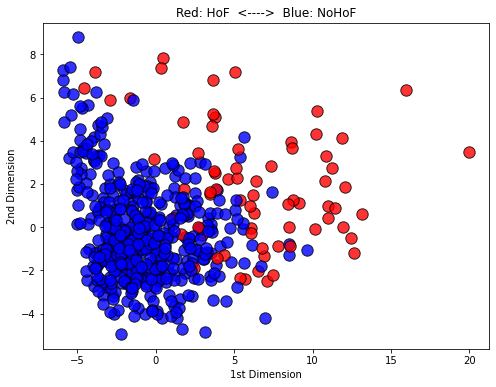

In [81]:
#plot_2d_data(X_pca2, y_temp.to_numpy())

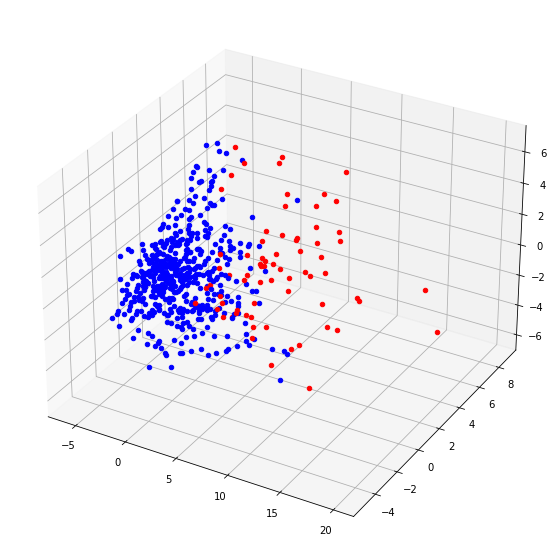

In [82]:
plot_3d_data(X_pca3, y_temp.to_numpy(), (10,10))

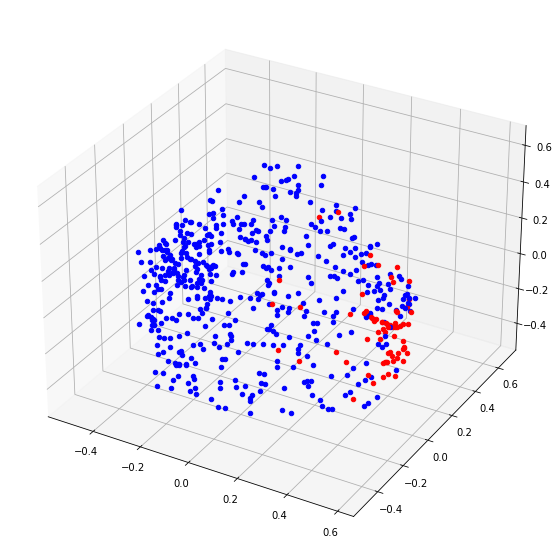

In [83]:
#kpca = KernelPCA(n_components=3, kernel='rbf')
#X_kpca3 = kpca.fit_transform(X_scaled)
#plot_3d_data(X_kpca3, y_temp.to_numpy(), (10,10))

In [35]:
from sklearn.manifold import TSNE

In [36]:
X_tsne3 = TSNE(n_components=3).fit_transform(X_scaled)

/home/Belzico/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


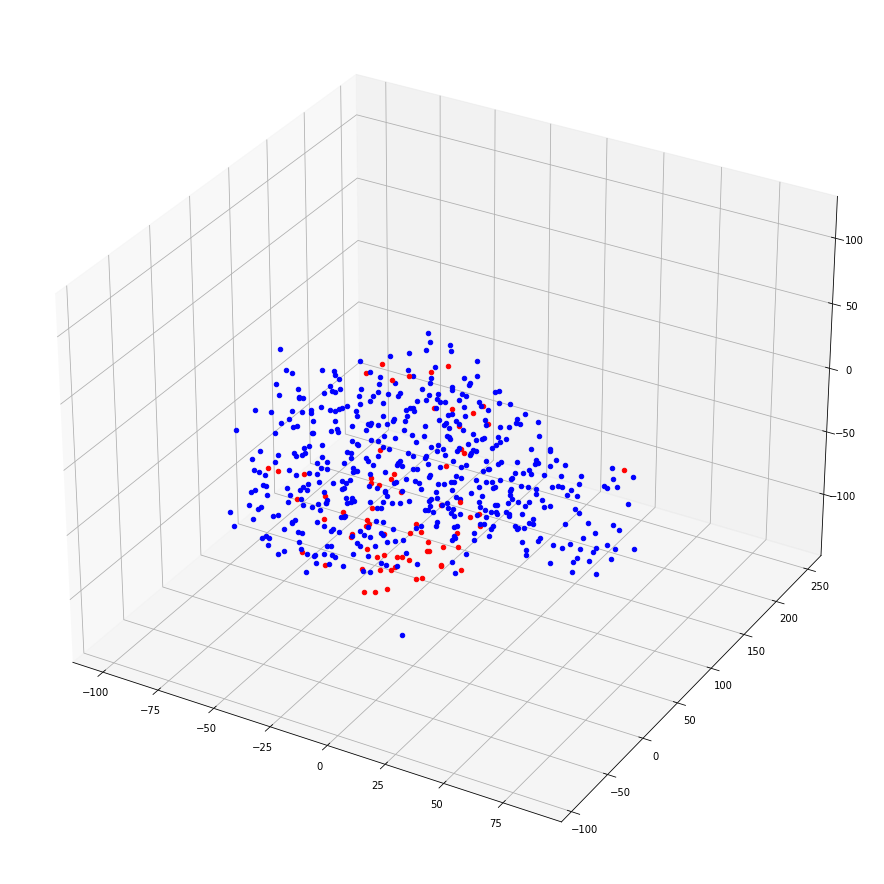

In [37]:
plot_3d_data(X_tsne3, y_temp.to_numpy())

In [38]:
X = select_features(inactive_plus_10_season, features+target)
X

retirement_age  total_seasons  play_in_mayors  play_in_negro_league  \
0                39             13               1                     0   
1                31             10               1                     0   
2                39             16               1                     0   
3                44             19               1                     0   
4                31             10               1                     0   
..              ...            ...             ...                   ...   
574              34             12               1                     0   
575              40             15               1                     0   
576              44             22               1                     0   
577              39             13               1                     0   
578              40             19               1                     0   

     two_way_player   W_pt   L_pt  W-L%_pt  ERA_pt   G_pt  GS_pt  GF_pt  \
0                 0  142.0   75.0    0.654    3.75  352.0  241.0   68.0   
1                 0  130.0  101.0    0.563    4.42  333.0  261.0   40.0   
2                 0   75.0   72.0    0.510    3.25  447.0  149.0  124.0   
3                 0  194.0  140.0    0.581    2.76  482.0  354.0   90.0   
4                 0   87.0  108.0    0.446    4.25  263.0  254.0    5.0   
..              ...    ...    ...      ...     ...    ...    ...    ...   
574               0  107.0  109.0    0.495    4.10  312.0  300.0    4.0   
575               0  132.0  116.0    0.532    4.19  424.0  330.0   34.0   
576               0  511.0  315.0    0.619    2.63  906.0  815.0   84.0   
577               0  111.0  109.0    0.505    3.74  304.0  270.0   13.0   
578               0  186.0  191.0    0.493    3.73  533.0  408.0   83.0   

     CG_pt  SHO_pt  SV_pt   IP_pt    H_pt    R_pt   ER_pt  HR_pt   BB_pt  \
0    109.0    17.0   16.0  1950.1  1849.0   924.0   813.0  103.0   738.0   
1    126.0    14.0    2.0  1963.1  2230.0  1106.0   964.0  129.0   706.0   
2     44.0     9.0   33.0  1375.1  1216.0   562.0   496.0  123.0   479.0   
3    205.0    44.0   16.0  2995.1  2841.0  1133.0   917.0   67.0   430.0   
4     31.0     6.0    0.0  1674.0  1779.0   880.0   791.0  154.0   620.0   
..     ...     ...    ...     ...     ...     ...     ...    ...     ...   
574    9.0     4.0    1.0  1863.2  1855.0   900.0   848.0  240.0   569.0   
575   10.0     2.0    0.0  2216.1  2217.0  1096.0  1031.0  309.0   711.0   
576  749.0    76.0   18.0  7356.0  7092.0  3167.0  2147.0  138.0  1217.0   
577   79.0    20.0    1.0  1849.0  1978.0   889.0   769.0  149.0   526.0   
578  185.0    24.0   23.0  3126.1  3580.0  1551.0  1295.0  118.0   914.0   

      SO_pt  BK_pt  WP_pt    BF_pt  ERA+_pt  FIP_pt  WHIP_pt  H9_pt  HR9_pt  \
0    1070.0    5.0   68.0   8292.0    113.0    3.63    1.326    8.5     0.5   
1     594.0    3.0    8.0   8686.0    101.0    4.18    1.495   10.2     0.6   
2     856.0    9.0   35.0   5790.0    117.0    3.59    1.232    8.0     0.8   
3    1036.0    2.0   26.0  11947.0    118.0    2.70    1.092    8.5     0.2   
4     888.0   11.0   53.0   7211.0     99.0    4.25    1.433    9.6     0.8   
..      ...    ...    ...      ...      ...     ...      ...    ...     ...   
574  1103.0    3.0   30.0   7889.0    108.0    4.60    1.301    9.0     1.2   
575  1480.0    6.0   58.0   9475.0    103.0    4.63    1.321    9.0     1.3   
576  2803.0    3.0  156.0  29565.0    138.0    2.84    1.130    8.7     0.2   
577   705.0    4.0   32.0   7798.0    107.0    3.86    1.354    9.6     0.7   
578   720.0   15.0   38.0  13478.0    107.0    3.84    1.437   10.3     0.3   

     BB9_pt  SO9_pt  SO/W_pt  RAA_pt  WAA_pt  WAR_pt  RAR_pt  HoF  
0       3.4     4.9     1.45   104.0    10.1    27.9   327.0    0  
1       3.2     2.7     0.84   -22.0    -1.7    15.8   202.0    0  
2       3.1     5.6     1.79    84.0     9.6    21.0   181.0    0  
3       1.3     3.1     2.41   214.0    27.4    50.2   44

In [39]:
X.describe()

retirement_age  total_seasons  play_in_mayors  play_in_negro_league  \
count      574.000000     574.000000           574.0            574.000000   
mean        36.493031      14.482578             1.0              0.008711   
std          3.760146       3.333506             0.0              0.093005   
min         28.000000      10.000000             1.0              0.000000   
25%         34.000000      12.000000             1.0              0.000000   
50%         36.000000      14.000000             1.0              0.000000   
75%         39.000000      16.000000             1.0              0.000000   
max         58.000000      27.000000             1.0              1.000000   

       two_way_player        W_pt        L_pt     W-L%_pt      ERA_pt  \
count      574.000000  574.000000  574.000000  574.000000  574.000000   
mean         0.081882  148.559233  125.655052    0.535923    3.491446   
std          0.274423   65.388428   46.523272    0.053691    0.501415   
min          0.000000   35.000000   30.000000    0.372000    1.820000   
25%          0.000000  104.000000   94.000000    0.502000    3.182500   
50%          0.000000  133.000000  117.000000    0.532500    3.535000   
75%          0.000000  183.750000  150.000000    0.567000    3.827500   
max          1.000000  511.000000  315.000000    0.717000    4.990000   

              G_pt       GS_pt       GF_pt       CG_pt      SHO_pt  \
count   574.000000  574.000000  574.000000  574.000000  574.000000   
mean    469.489547  296.815331  103.109756  121.388502   19.503484   
std     171.964288  144.980617  143.337762  110.104332   14.422295   
min     153.000000    0.000000    0.000000    0.000000    0.000000   
25%     349.250000  221.500000   23.000000   44.250000    9.000000   
50%     424.500000  292.000000   53.000000   89.000000   17.000000   
75%     550.750000  371.000000  104.750000  172.000000   27.000000   
max    1252.000000  815.000000  802.000000  749.000000  110.000000   

            SV_pt        IP_pt         H_pt         R_pt        ER_pt  \
count  574.000000   574.000000   574.000000   574.000000   574.000000   
mean    33.900697  2403.736760  2339.529617  1102.301394   919.702091   
std     68.564683   960.177329   936.509329   462.970662   341.380168   
min      0.000000   708.200000   479.000000   252.000000   234.000000   
25%      4.000000  1756.425000  1694.750000   801.750000   691.250000   
50%     10.500000  2191.600000  2188.000000  1012.500000   870.500000   
75%     25.000000  2860.500000  2803.250000  1320.500000  1123.500000   
max    478.000000  7356.000000  7092.000000  3497.000000  2147.000000   

            HR_pt        BB_pt        SO_pt       BK_pt       WP_pt  \
count  574.000000   574.000000   574.000000  574.000000  574.000000   
mean   158.332753   747.357143  1270.764808    7.304878   59.836237   
std     89.570211   302.747621   641.997686    8.124000   44.394798   
min     10.000000   162.000000   378.000000    0.000000    1.000000   
25%     94.250000   538.250000   853.750000    2.000000   32.000000   
50%    145.500000   707.500000  1127.500000    5.000000   50.000000   
75%    209.000000   888.750000  1528.000000    9.000000   72.000000   
max    505.000000  2795.000000  5714.000000   90.000000  343.000000   

              BF_pt     ERA+_pt      FIP_pt     WHIP_pt       H9_pt  \
count    574.000000  574.000000  574.000000  574.000000  574.000000   
mean   10102.000000  110.559233    3.569355    1.292355    8.750523   
std     3987.584387   11.245126    0.470146    0.092422    0.723255   
min     2168.000000   92.000000    2.020000    1.000000    6.100000   
25%     7477.000000  102.250000    3.262500    1.232250    8.300000   
50%     9201.500000  108.000000    3.630000    1.293000    8.700000   
75%    12054.750000  116.000000    3.860000    1.354000    9.200000   
max    29565.000000  157.000000    5.000000    1.511000   10.800000   

           HR9_pt      BB9_pt      SO9_pt     SO/W_pt       RAA_pt  \
count  

In [40]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [41]:
hall = X[X['HoF']==1]
no_hall = X[X['HoF']==0]

In [42]:
from Models.functions.stats_bar import stats_bar_plot

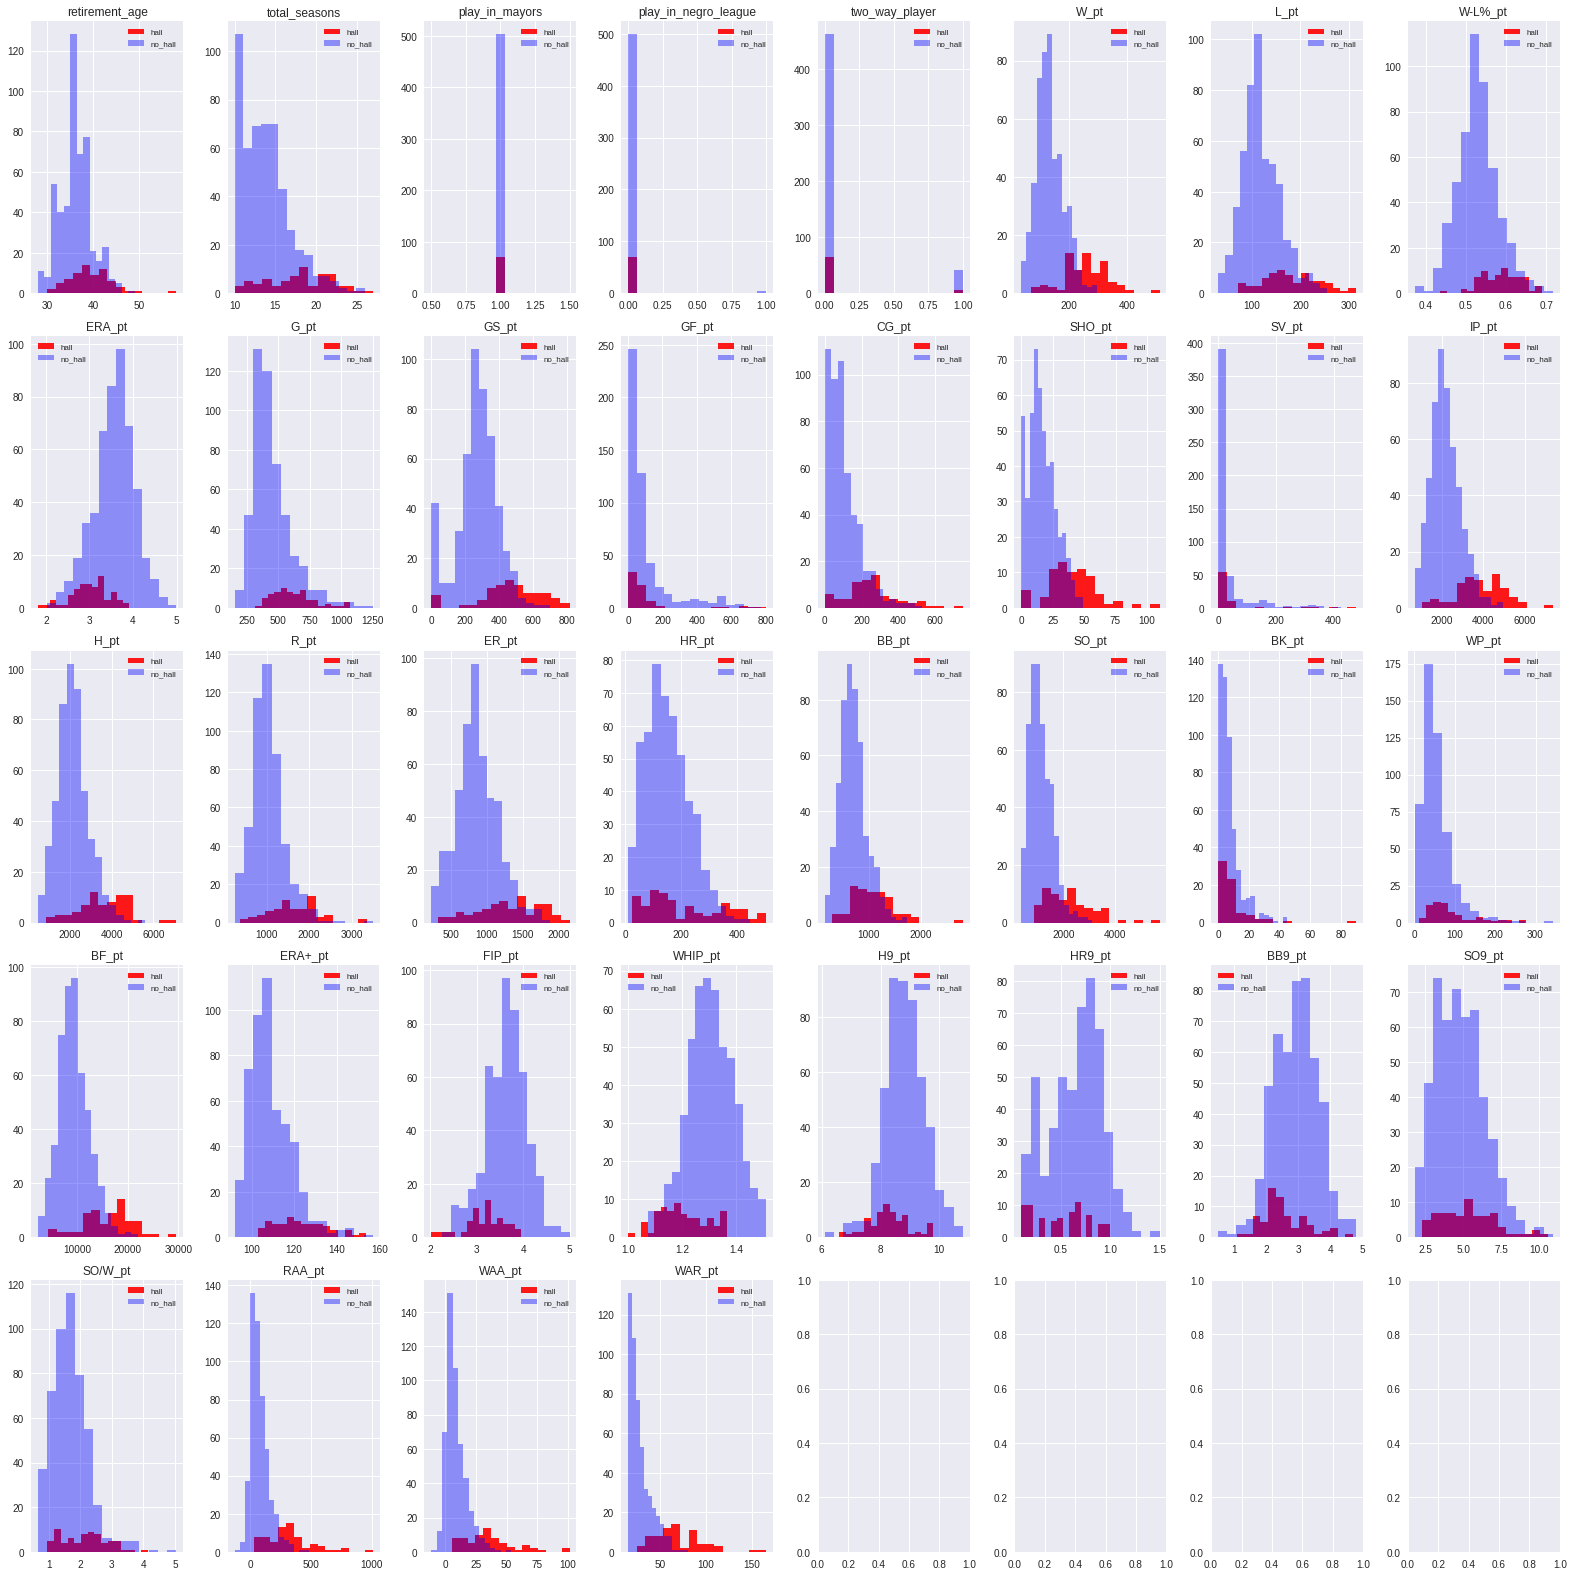

In [43]:
stats_bar_plot(hall, no_hall, features[:-1], 5,8,(22,22))

Las estadisticas defensivas no muestran practicamente diferencia en ambos grupos

In [44]:
of_features = ['retirement_age','total_seasons','play_in_mayors','play_in_negro_league','two_way_player'
            ,'W_pt','L_pt','W-L%_pt','ERA_pt','G_pt','GS_pt','GF_pt','CG_pt','SHO_pt','SV_pt',
            'IP_pt','H_pt','R_pt','ER_pt','HR_pt','BB_pt','SO_pt','BK_pt','WP_pt',
            'BF_pt','ERA+_pt','FIP_pt','WHIP_pt','H9_pt','HR9_pt','BB9_pt','SO9_pt','SO/W_pt',
            'RAA_pt','WAA_pt','WAR_pt','RAR_pt',]

#of_features = ['play_in_mayors','play_in_negro_league','two_way_player'
#            ,'W_pt','L_pt','W-L%_pt','ERA_pt','G_pt','GS_pt','GF_pt','CG_pt','SHO_pt','SV_pt',
#            'IP_pt','H_pt','R_pt','ER_pt','HR_pt','BB_pt','SO_pt',
#            'BF_pt','ERA+_pt','FIP_pt','WHIP_pt','SO/W_pt',
#            'RAA_pt','WAA_pt','WAR_pt','RAR_pt',]

In [45]:
from Models.functions.feature_imp import clasifier_ft_importance_experiments, plot_feature_importance

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Veamos la correlacion de las variables respecto al Target

In [47]:
df = select_features(inactive_plus_10_season, of_features+['HoF'])

df_corr = df.corr()['HoF'].abs().sort_values(ascending=False)
#df_corr

In [48]:
import seaborn as sns
from matplotlib import rcParams

<AxesSubplot:>

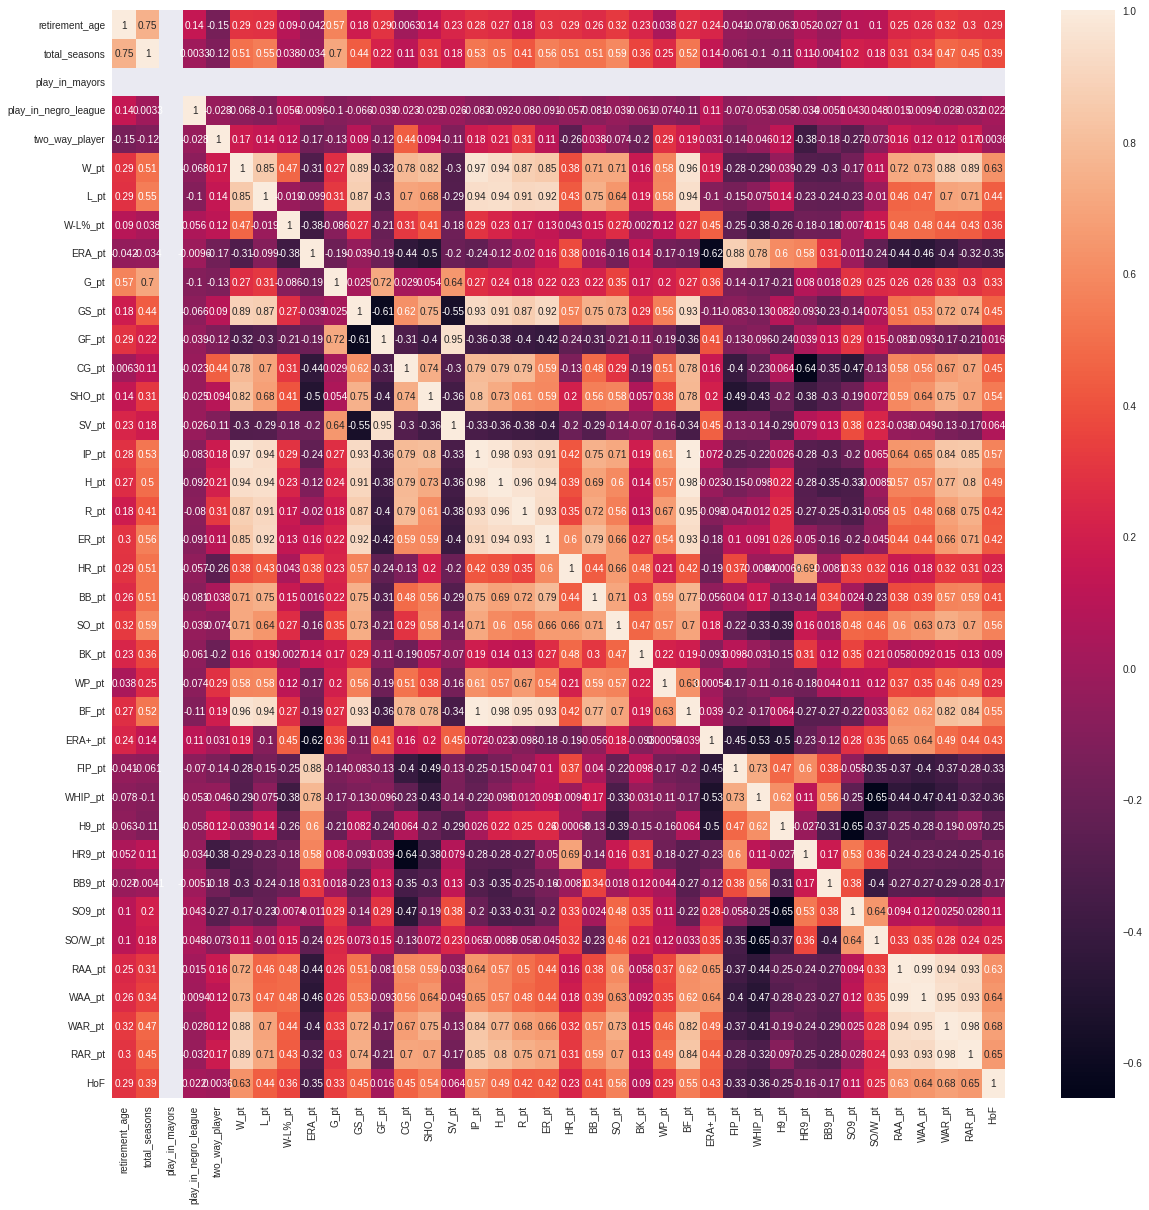

In [50]:
#m_corr = df.corr()
#rcParams['figure.figsize'] = 20,20
#sns.heatmap(m_corr, annot=True)

Vamos a quitarnos aquellos features con alta correlacion, teniendo en cuenta aquellas estadisticas que son sensibles dentro de la eleccion de un jugador a la hora de evaluar su rendimiento

In [51]:
reduced_features = ['total_seasons','WAR_pt', 'WHIP_pt', 'ERA_pt', 'BB_pt','ER_pt','G_pt','W-L%_pt','R_pt','SHO_pt' ]

In [52]:
df = select_features(inactive_plus_10_season, reduced_features+['HoF'])

df_corr = df.corr()['HoF'].abs().sort_values(ascending=False)
df_corr

HoF              1.000000
WAR_pt           0.683367
SHO_pt           0.539545
ER_pt            0.419178
R_pt             0.418160
BB_pt            0.412026
total_seasons    0.385656
WHIP_pt          0.364243
W-L%_pt          0.358806
ERA_pt           0.353767
G_pt             0.334447
Name: HoF, dtype: float64

<AxesSubplot:>

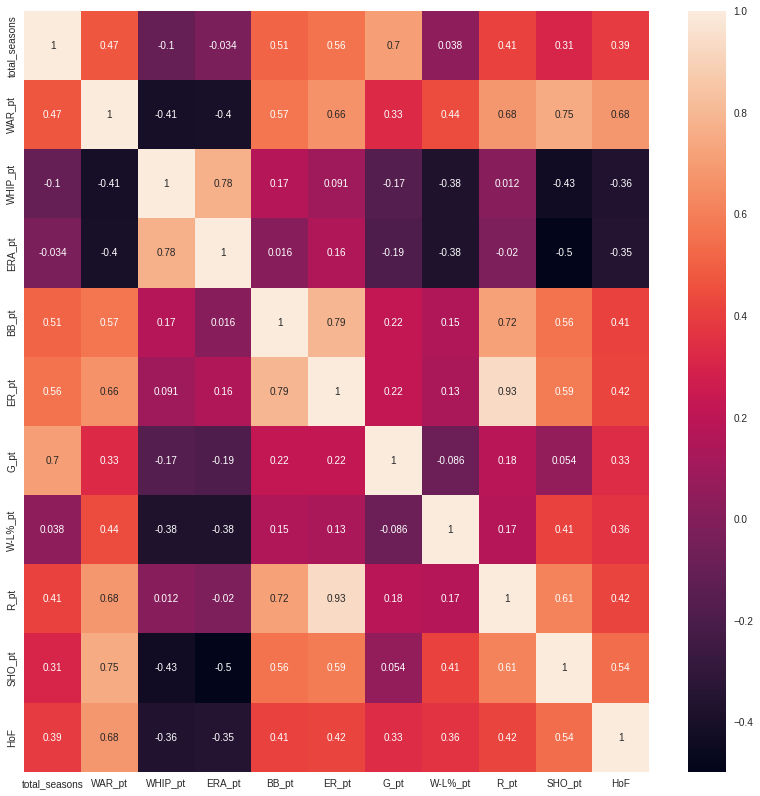

In [110]:
#m_corr = df.corr()
#rcParams['figure.figsize'] = 14,14
#sns.heatmap(m_corr, annot=True)

In [53]:
X_df = select_features(inactive_plus_10_season, reduced_features)
y_df = select_features(inactive_plus_10_season, ['HoF'])

In [54]:
X_df

total_seasons  WAR_pt  WHIP_pt  ERA_pt   BB_pt   ER_pt   G_pt  W-L%_pt  \
0               13    27.9    1.326    3.75   738.0   813.0  352.0    0.654   
1               10    15.8    1.495    4.42   706.0   964.0  333.0    0.563   
2               16    21.0    1.232    3.25   479.0   496.0  447.0    0.510   
3               19    50.2    1.092    2.76   430.0   917.0  482.0    0.581   
4               10    19.7    1.433    4.25   620.0   791.0  263.0    0.446   
..             ...     ...      ...     ...     ...     ...    ...      ...   
574             12    27.7    1.301    4.10   569.0   848.0  312.0    0.495   
575             15    27.6    1.321    4.19   711.0  1031.0  424.0    0.532   
576             22   165.6    1.130    2.63  1217.0  2147.0  906.0    0.619   
577             13    20.5    1.354    3.74   526.0   769.0  304.0    0.505   
578             19    37.5    1.437    3.73   914.0  1295.0  533.0    0.493   

       R_pt  SHO_pt  
0     924.0    17.0  
1    1106.0    14.0  
2     562.0     9.0  
3    1133.0    44.0  
4     880.0     6.0  
..      ...     ...  
574   900.0     4.0  
575  1096.0     2.0  
576  3167.0    76.0  
577   889.0    20.0  
578  1551.0    24.0  

[574 rows x 10 columns]

In [55]:
X_df.reset_index(inplace=True, drop=True)
y_df.reset_index(inplace=True, drop=True)


In [56]:
print(X_df.index)
y_df.index

RangeIndex(start=0, stop=574, step=1)


RangeIndex(start=0, stop=574, step=1)

In [57]:
X_df.describe()

total_seasons      WAR_pt     WHIP_pt      ERA_pt        BB_pt  \
count     574.000000  574.000000  574.000000  574.000000   574.000000   
mean       14.482578   33.119861    1.292355    3.491446   747.357143   
std         3.333506   19.888417    0.092422    0.501415   302.747621   
min        10.000000   15.000000    1.000000    1.820000   162.000000   
25%        12.000000   19.825000    1.232250    3.182500   538.250000   
50%        14.000000   25.950000    1.293000    3.535000   707.500000   
75%        16.000000   40.125000    1.354000    3.827500   888.750000   
max        27.000000  165.600000    1.511000    4.990000  2795.000000   

             ER_pt         G_pt     W-L%_pt         R_pt      SHO_pt  
count   574.000000   574.000000  574.000000   574.000000  574.000000  
mean    919.702091   469.489547    0.535923  1102.301394   19.503484  
std     341.380168   171.964288    0.053691   462.970662   14.422295  
min     234.000000   153.000000    0.372000   252.000000    0.000000  
25%     691.250000   349.250000    0.502000   801.750000    9.000000  
50%     870.500000   424.500000    0.532500  1012.500000   17.000000  
75%    1123.500000   550.750000    0.567000  1320.500000   27.000000  
max    2147.000000  1252.000000    0.717000  3497.000000  110.000000

In [58]:
print(X_df.shape)
y_df.shape

(574, 10)


(574, 1)

In [59]:
y_df.value_counts()

HoF
0      503
1       71
dtype: int64

Vemos el porcentaje de pertenencia a la clase minoritaria

In [60]:
round((71/574),3)*100

12.4

El corpus es debalanceado y no es necesaria la separacion por grupos asi que utilizaremos StratifiedKFold para el entrenamiento

Vamos a marcar primero el baseline del problema, utilizando la prediccion negativa para cada jugador

In [61]:
from sklearn.model_selection import train_test_split

X, X_tester, y, y_tester = train_test_split(X_df, y_df,test_size=0.2, shuffle=True, random_state=17)

Vamos a tener una primera idea de como es el comportamiento inicial de los algoritmos frente al corpus sin procesamiento previo

In [62]:
from Models.functions.models_performance_comparer import performance_comparer

In [64]:
X_tester.reset_index(inplace=True, drop=True)
y_tester.reset_index(inplace=True, drop=True)

X.reset_index(inplace=True, drop=True)
y.reset_index(inplace=True, drop=True)

In [65]:
print(X.shape)
y.shape

(459, 10)


(459, 1)

In [66]:
print(y.value_counts())
y_tester.value_counts()

HoF
0      402
1       57
dtype: int64


HoF
0      101
1       14
dtype: int64

Vamos a marcar primero el baseline del problema, utilizando la prediccion negativa para cada jugador

In [67]:
from Models.functions.metrics import show_baseline_score
show_baseline_score(baseline=np.zeros_like(np.ravel(y)), y_val=np.ravel(y))

Accuracy: 0.8758
AUC: 0.5000


Vamos a tener una primera idea de como es el comportamiento inicial de los algoritmos frente al corpus sin procesamiento previo

In [69]:
from Models.functions.models_performance_comparer import performance_comparer_plus

from Models.functions.parameters_selection import model_parameter_optimization

In [70]:
#from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [71]:
dt_params = {'criterion':['gini','entropy'], 'max_depth':[2,3,4,5]}
#dt_clf = model_parameter_optimization(DecisionTreeClassifier(), dt_params, X, y, refit=True)

lr_params = {'penalty':['l1','l2'], 'tol':[1e-4, 1e-3,1e-2], 'C':np.arange(1,5,0.5), 'max_iter':np.arange(100, 10000, 1000)}
#lr_clf = model_parameter_optimization(LogisticRegression(solver='liblinear'), lr_params, X, np.ravel(y), refit=True)

rf_params = {'criterion':['gini','entropy'], 'n_estimators':[2,3,4,5]}
#rf_clf = model_parameter_optimization(RandomForestClassifier(max_depth=3), rf_params, X, np.ravel(y), refit=True)

knn_params = {'n_neighbors':np.arange(2,50)}
#knn_clf = model_parameter_optimization(KNeighborsClassifier(), knn_params, X, np.ravel(y),refit=True)

svmp_params = {'degree':np.arange(2,9), 'C':np.arange(1,4,0.2)}
#svmp_clf = model_parameter_optimization(SVC(kernel='poly',probability=True), svmp_params, X, np.ravel(y),refit=True)

svmp_params = {'C':np.arange(1,10,0.2)}
#svmp_clf = model_parameter_optimization(SVC(kernel='poly',probability=True, degree=4), svmp_params, X, np.ravel(y),refit=True)


In [72]:
dt_params = {'criterion':['gini','entropy'], 'max_depth':[2,3,4,5]}
#dt_clf = model_parameter_optimization(DecisionTreeClassifier(), dt_params, X, y, refit=True)

In [73]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [74]:
lr_params = {'penalty':['l1','l2'], 'tol':[1e-4, 1e-3,1e-2], 'C':np.arange(1,5,0.5), 'max_iter':np.arange(100, 10000, 1000)}
#lr_clf = model_parameter_optimization(LogisticRegression(solver='liblinear'), lr_params, X, np.ravel(y), refit=True)


In [75]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1', max_iter=100, C=2)

In [76]:
rf_params = {'criterion':['gini','entropy'], 'n_estimators':[2,3,4,5]}
#rf_clf = model_parameter_optimization(RandomForestClassifier(max_depth=3), rf_params, X, np.ravel(y), refit=True)

In [77]:
rf_clf = RandomForestClassifier(max_depth=3, criterion='entropy', n_estimators=5)

In [78]:
knn_params = {'n_neighbors':np.arange(2,50)}
#knn_clf = model_parameter_optimization(KNeighborsClassifier(), knn_params, X, np.ravel(y),refit=True)

In [79]:
knn_clf = KNeighborsClassifier(n_neighbors=34)

In [80]:
svmp_params = {'degree':np.arange(2,9), 'C':np.arange(1,4,0.2)}
#svmp_clf = model_parameter_optimization(SVC(kernel='poly',probability=True), svmp_params, X, np.ravel(y),refit=True)

In [81]:
svmp_params = {'C':np.arange(1,10,0.2)}
#svmp_clf = model_parameter_optimization(SVC(kernel='poly',probability=True, degree=4), svmp_params, X, np.ravel(y),refit=True)

In [82]:
svmp_clf = SVC(kernel='poly',probability=True, C=3.8, degree=4)

In [83]:
svmr_params = {'C':np.arange(4,10,0.2)}
#svmr_clf = model_parameter_optimization(SVC(kernel='rbf',probability=True), svmr_params, X, np.ravel(y),refit=True)

In [84]:
svmr_clf = SVC(kernel='rbf',probability=True, C=9.8)

In [85]:
models  = [dt_clf, lr_clf, rf_clf, knn_clf, svmp_clf, svmr_clf]
models_labels = ['dt_1', 'lr_1', 'rf_1','knn_1','svmp_1', 'svmr_1']

Model : dt_1


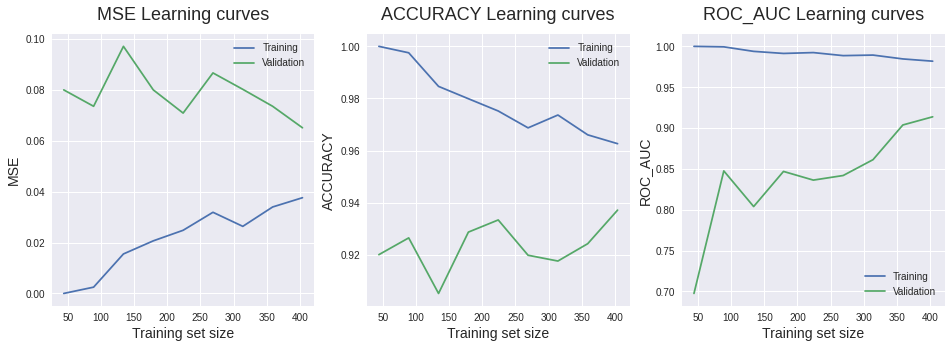

mACC:0.921
mAUC:0.869
<----------------------------------->

Model : lr_1


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinea

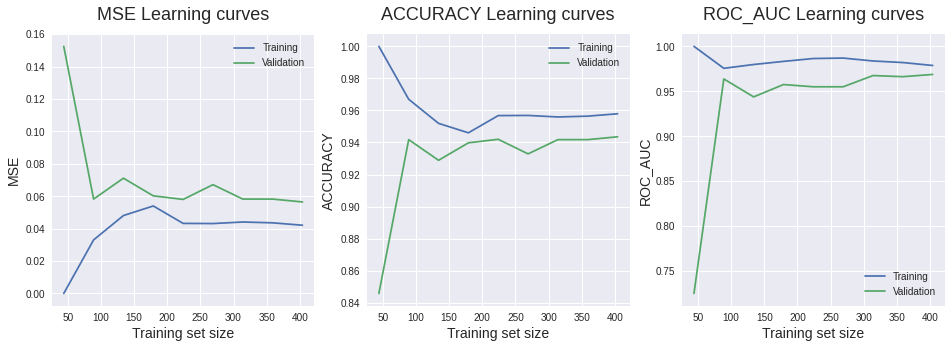

mACC:0.939
mAUC:0.963
<----------------------------------->

Model : rf_1


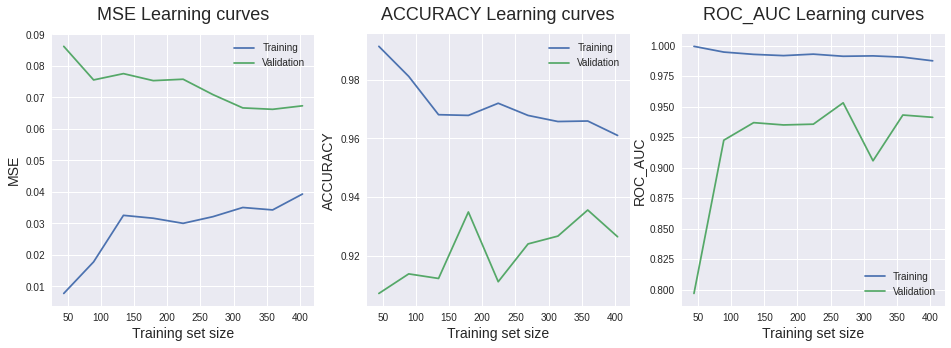

mACC:0.929
mAUC:0.934
<----------------------------------->

Model : knn_1


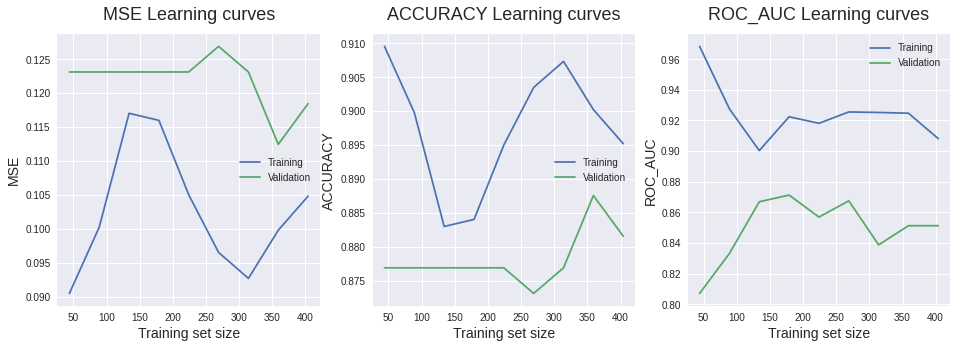

mACC:0.879
mAUC:0.852
<----------------------------------->

Model : svmp_1


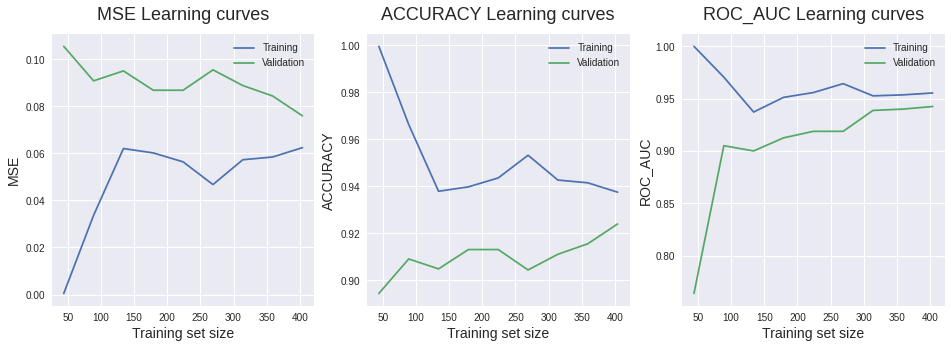

mACC:0.91
mAUC:0.932
<----------------------------------->

Model : svmr_1


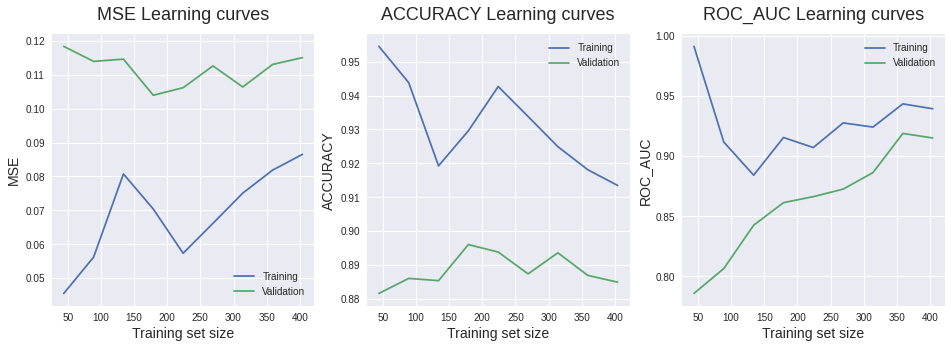

mACC:0.889
mAUC:0.893
<----------------------------------->



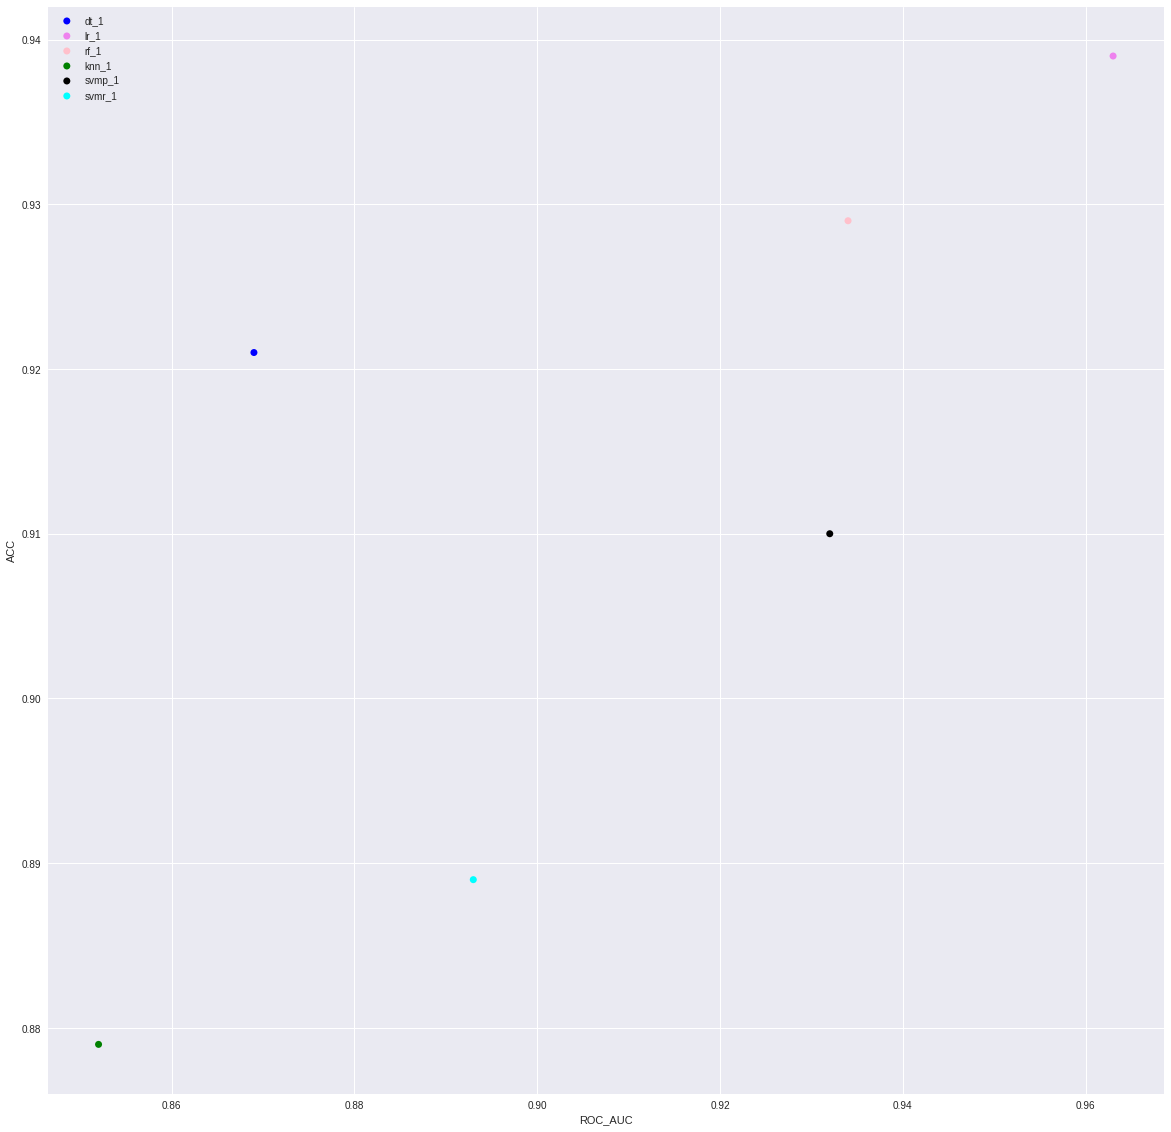

In [86]:
performance_comparer_plus(X, y, models, models_labels)

Vamos a probar con los algoritmos de seleccion de features 

In [87]:
from sklearn.feature_selection import RFE, RFECV

def feature_selection_RFE(clf,X,y,n_features=5):
    rfe = RFE(estimator=clf, n_features_to_select=n_features)
    rfe.fit(X, y)
    for i in range(X.shape[1]):
        if rfe.support_[i]:
    	    print(f'Feature: {X.columns[i]}, Rank: {rfe.ranking_[i]}')

In [88]:
feature_selection_RFE(DecisionTreeClassifier(max_depth=3),X, np.ravel(y), 10)

Feature: total_seasons, Rank: 1
Feature: WAR_pt, Rank: 1
Feature: WHIP_pt, Rank: 1
Feature: ERA_pt, Rank: 1
Feature: BB_pt, Rank: 1
Feature: ER_pt, Rank: 1
Feature: G_pt, Rank: 1
Feature: W-L%_pt, Rank: 1
Feature: R_pt, Rank: 1
Feature: SHO_pt, Rank: 1


In [89]:
from numpy import mean
def automatic_feature_selection(estimators, X, y, n_repetition):
    features_selected  = {}
    count = 0
    for est in estimators:
        rfecv = RFECV(estimator=est)
        for r in range(n_repetition):
            count+=1
            rfecv.fit(X, np.ravel(y))
            for i in range(X.shape[1]):
                if rfecv.support_[i]:
                    feat = X.columns[i]
                    rank = rfecv.ranking_[i]
                    if features_selected.get(feat) == None:
                        features_selected[feat] = [1,rank]
                    else:
                        features_selected[feat][0]+=1
                        features_selected[feat][1]+=rank
    s_features = []
    for feat in features_selected.keys():
        n_selection = features_selected[feat][0]
        m_rank = features_selected[feat][1]/n_selection
        m_selection = (features_selected[feat][0]/count)*100
        s_features.append((feat,m_selection,m_rank))
    s_features.sort(key=lambda x: x[1], reverse=True)
    print(f"Total selections:{count}")
    return s_features
        

Vamos a standarizar los datos

In [90]:
from sklearn.preprocessing import StandardScaler

In [92]:
sc = StandardScaler()
X_st = sc.fit_transform(X)

Vamos a ver que representacion queda de la reduccion de dimensiones

In [93]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_st)

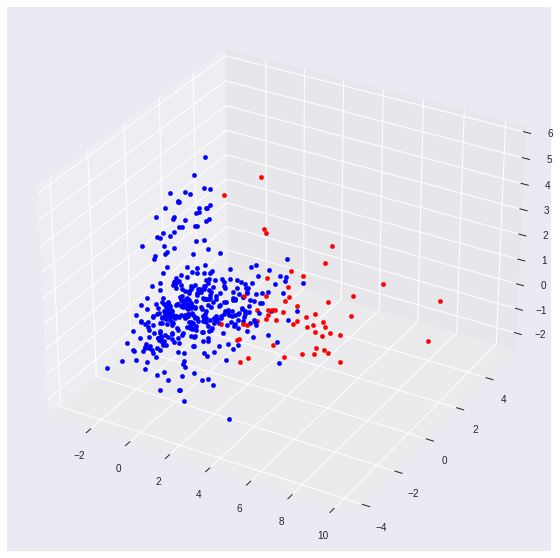

In [94]:
plot_3d_data(X_pca3, y.to_numpy(), (10,10))

In [95]:
X_tsne3 = TSNE(n_components=3).fit_transform(X_st)

/home/Belzico/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


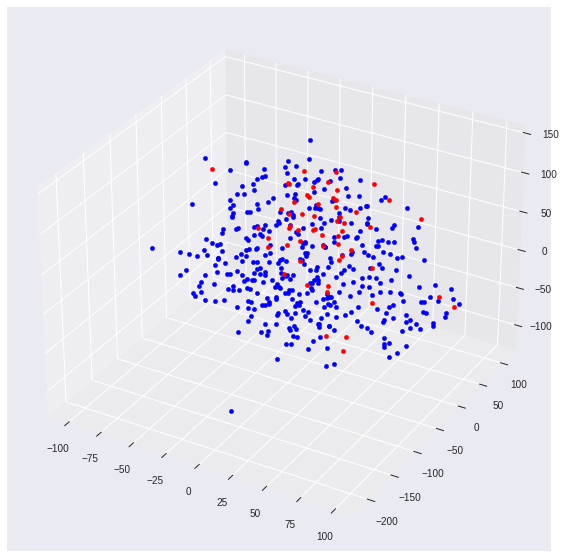

In [96]:
plot_3d_data(X_tsne3, y.to_numpy(), (10,10))

In [97]:
models_labels2 =  [l+'_st' for l in models_labels]

Model : dt_1_st


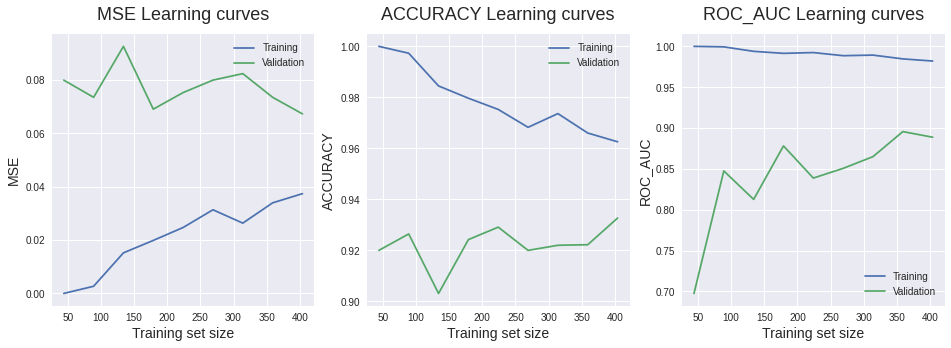

mACC:0.921
mAUC:0.87
<----------------------------------->

Model : lr_1_st


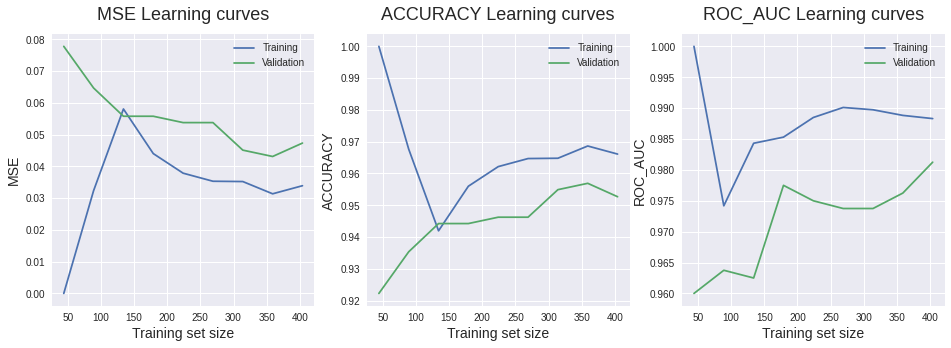

mACC:0.953
mAUC:0.975
<----------------------------------->

Model : rf_1_st


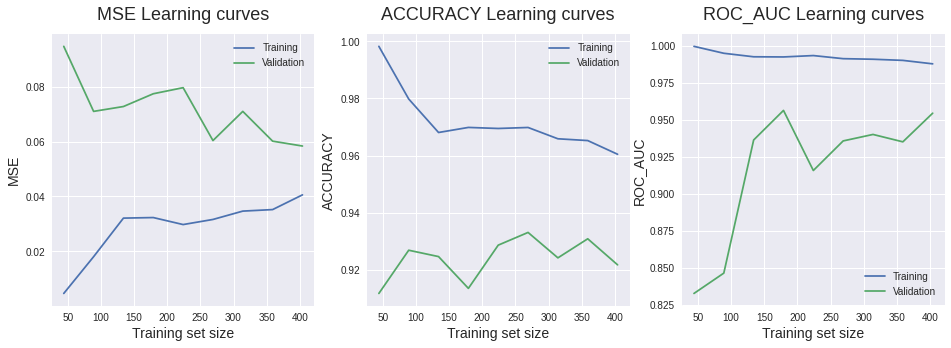

mACC:0.929
mAUC:0.937
<----------------------------------->

Model : knn_1_st


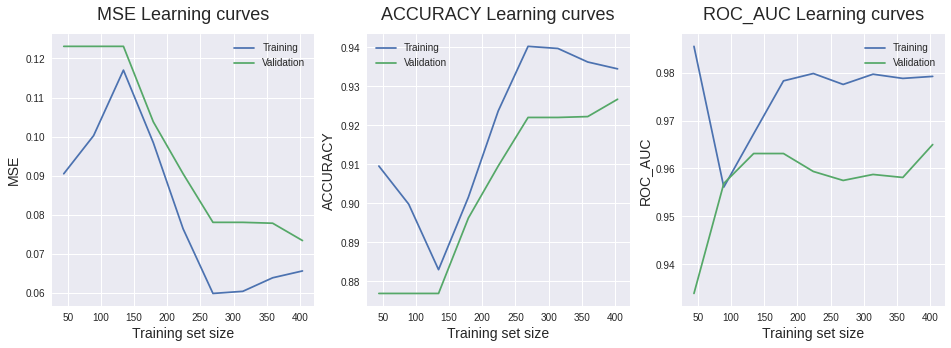

mACC:0.922
mAUC:0.958
<----------------------------------->

Model : svmp_1_st


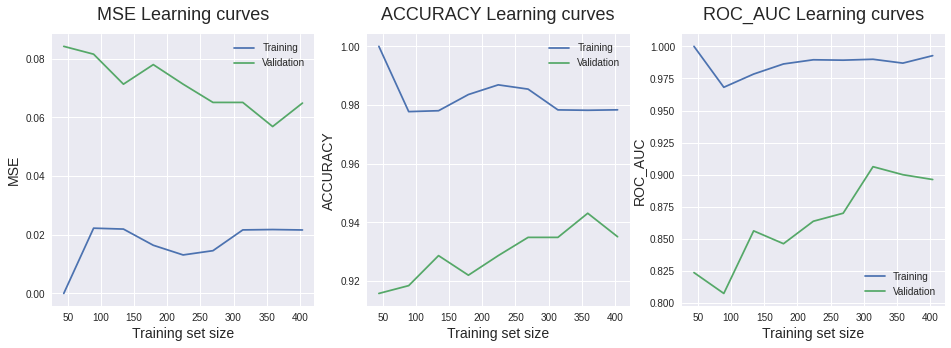

mACC:0.938
mAUC:0.892
<----------------------------------->

Model : svmr_1_st


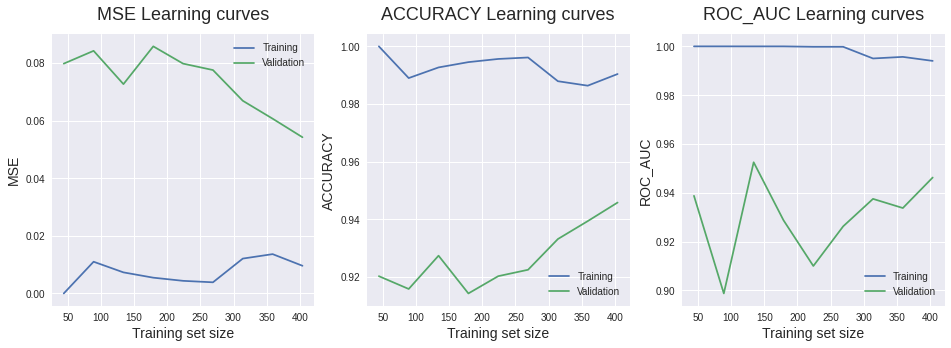

mACC:0.932
mAUC:0.932
<----------------------------------->



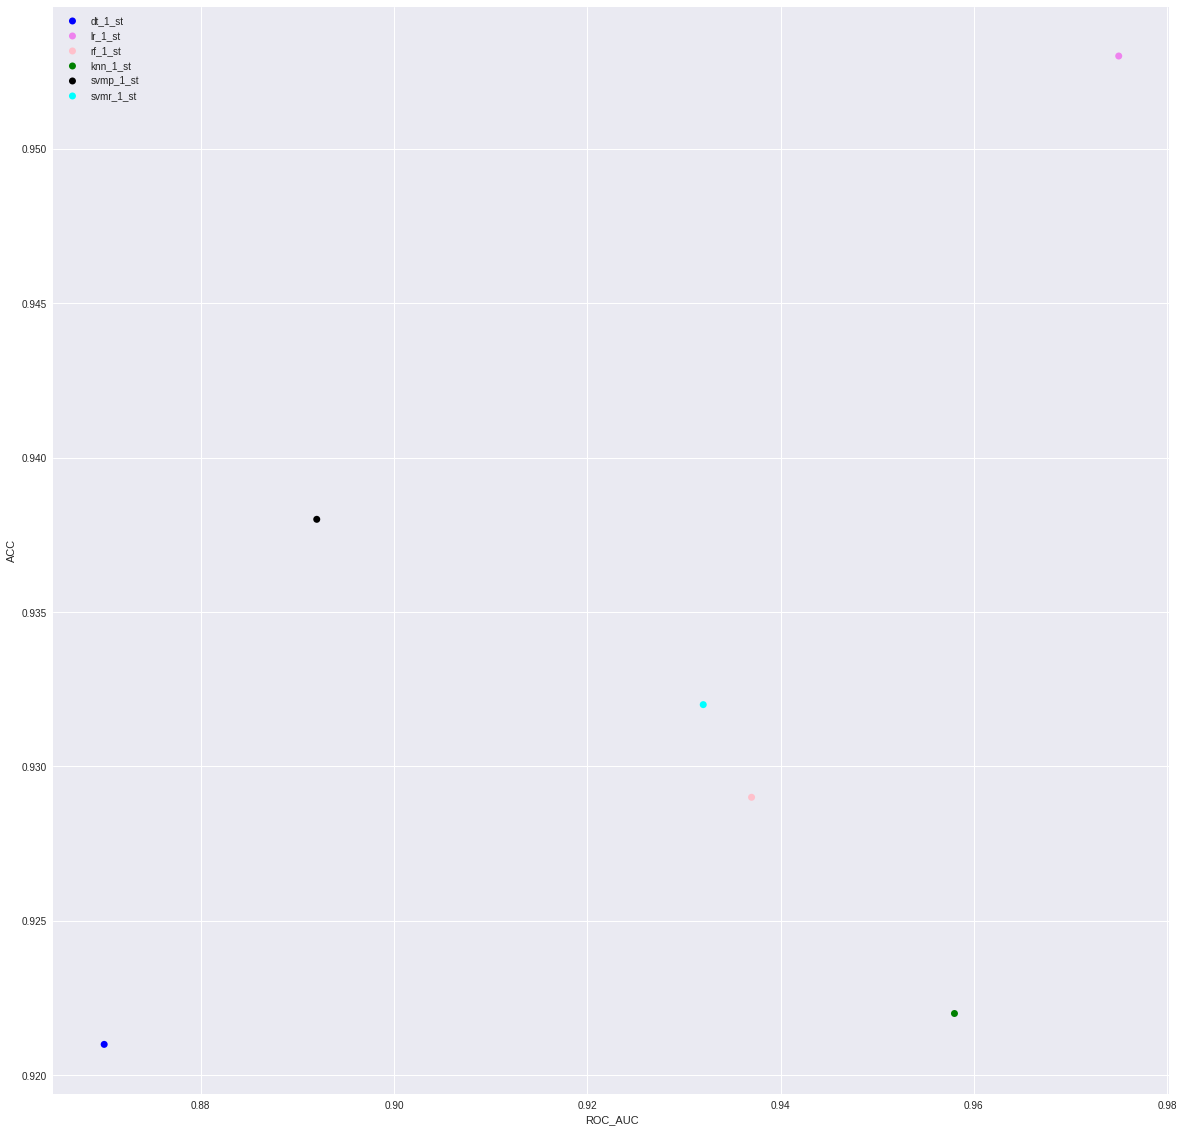

In [98]:
performance_comparer_plus(X_st, y, models, models_labels2)

Vamos a utilizar las tecnicas de reduccion de dimensiones para buscar una mejora en los performance

In [99]:
kpca = KernelPCA(kernel='poly', degree=4)
X_kpca_r = kpca.fit_transform(X_st)

In [100]:
#dt_kpca_params = {'criterion':['gini','entropy'], 'max_depth':[3,4,5]}
#dt_kpca_clf = model_parameter_optimization(DecisionTreeClassifier(), dt_kpca_params, X_kpca_r, y, refit=True)
dt_kpca_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [101]:
lr_kpca_params = {'penalty':['l1','l2'], 'C':np.arange(1,5,0.5), 'max_iter':np.arange(100, 10000, 2000)}
#lr_kpca_clf = model_parameter_optimization(LogisticRegression(solver='liblinear'), lr_kpca_params, X_kpca_r, np.ravel(y), refit=True)

In [102]:
lr_kpca_clf = LogisticRegression(solver='liblinear', C=1, penalty='l1')

In [103]:
rf_kpca_params = {'n_estimators':[3,4,5,6]}
#rf_kpca_clf = model_parameter_optimization(RandomForestClassifier(criterion='entropy',max_depth=3), rf_kpca_params, X_kpca_r, np.ravel(y), refit=True)

In [104]:
rf_kpca_clf = RandomForestClassifier(n_estimators=5, criterion='entropy',max_depth=3)

In [105]:
knn_kpca_params = {'n_neighbors':np.arange(10,50)}
#knn_kpca_clf = model_parameter_optimization(KNeighborsClassifier(), knn_kpca_params, X_kpca_r, np.ravel(y),refit=True)

In [106]:
knn_kpca_clf = KNeighborsClassifier(n_neighbors=48)

In [107]:
svmp_kpca_params = {'degree':np.arange(3,8), 'C':np.arange(1,5.6,0.5)}
#svmp_kpca_clf = model_parameter_optimization(SVC(kernel='poly',probability=True), svmp_kpca_params, X_kpca_r, np.ravel(y), cv=10,refit=True)

In [108]:
svmp_kpca_clf = SVC(kernel='poly',probability=True, C=2.0, degree=3)

In [109]:
svmr_kpca_params = {'C':np.arange(1,10,1)}
svmr_kpca_clf = model_parameter_optimization(SVC(kernel='rbf',probability=True), svmr_kpca_params, X_kpca_r, np.ravel(y), cv=10,refit=True)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 4} : 0.9704329268292682 roc_auc


In [110]:
svmr_kpca_clf = SVC(probability=True, C=7.0)

In [111]:
models_kpca = [dt_kpca_clf, lr_kpca_clf, rf_kpca_clf, knn_kpca_clf, svmp_kpca_clf, svmr_kpca_clf]

In [112]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [113]:
lda = LinearDiscriminantAnalysis()
X_lda_r = lda.fit_transform(X_st, y)

/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [114]:
dt_lda_params = {'criterion':['gini','entropy'], 'max_depth':[3,4,5]}
dt_lda_clf = model_parameter_optimization(DecisionTreeClassifier(), dt_lda_params, X_lda_r, y, refit=True)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'gini', 'max_depth': 3} : 0.9684523809523811 roc_auc


In [115]:
lr_lda_params = {'penalty':['l1','l2'], 'C':np.arange(1,3,0.2), 'max_iter':np.arange(100, 1200, 500)}
lr_lda_clf = model_parameter_optimization(LogisticRegression(solver='liblinear'), lr_lda_params, X_lda_r, np.ravel(y), refit=True)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 1.0, 'max_iter': 100, 'penalty': 'l1'} : 0.9800366300366299 roc_auc


In [116]:
rf_lda_params = {'n_estimators':[3,4,5,6,7,8,9,10,11]}
rf_lda_clf = model_parameter_optimization(RandomForestClassifier(criterion='entropy', max_depth=3), rf_lda_params, X_lda_r, np.ravel(y), refit=True)


Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'n_estimators': 9} : 0.9706043956043955 roc_auc


In [122]:
knn_lda_params = {'n_neighbors':np.arange(5,100)}
knn_lda_clf = model_parameter_optimization(KNeighborsClassifier(), knn_lda_params, X_lda_r, np.ravel(y),refit=True)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'n_neighbors': 23} : 0.9837912087912087 roc_auc


In [121]:
svmp_lda_params = {'degree':np.arange(1,3), 'C':np.arange(1,5.6,0.2)}
svmp_lda_clf = model_parameter_optimization(SVC(kernel='poly',probability=True), svmp_lda_params, X_lda_r, np.ravel(y),refit=True)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 1.0, 'degree': 1} : 0.9800366300366299 roc_auc


In [123]:
models_lda = [dt_lda_clf,lr_lda_clf, rf_lda_clf, knn_lda_clf, svmp_lda_clf]

Model : dt_1_st_lda


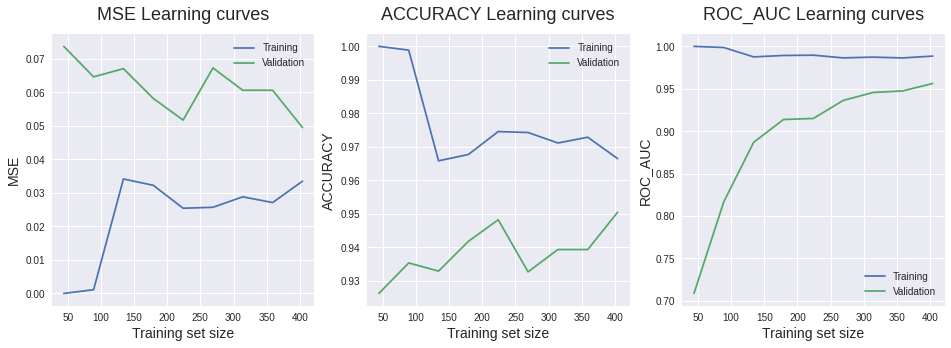

mACC:0.937
mAUC:0.943
<----------------------------------->

Model : lr_1_st_lda


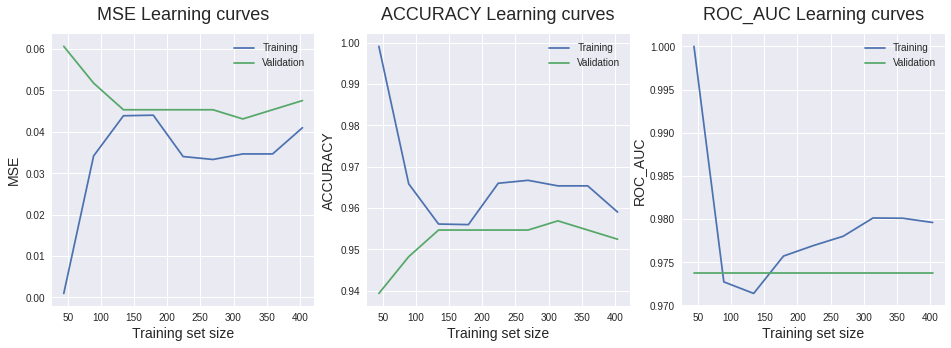

mACC:0.955
mAUC:0.974
<----------------------------------->

Model : rf_1_st_lda


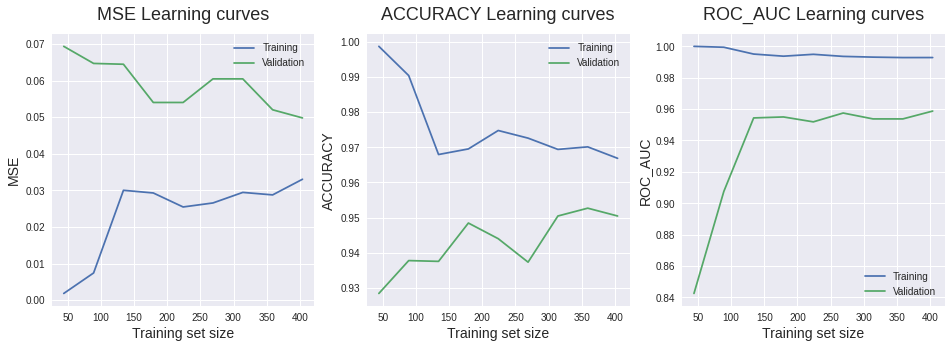

mACC:0.947
mAUC:0.955
<----------------------------------->

Model : knn_1_st_lda


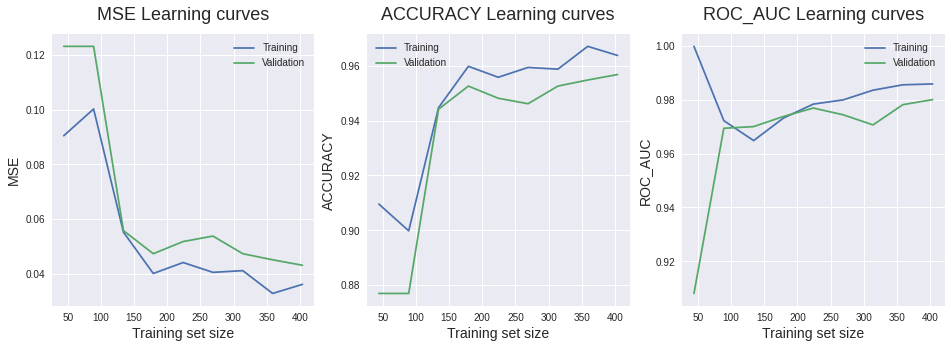

mACC:0.951
mAUC:0.974
<----------------------------------->

Model : svmp_1_st_lda


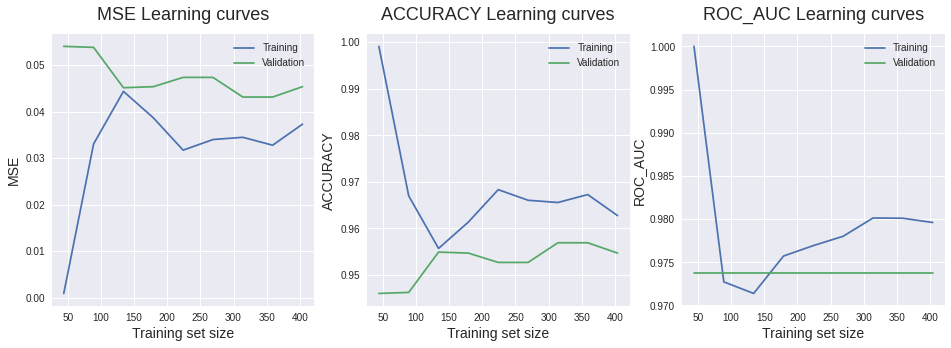

mACC:0.955
mAUC:0.974
<----------------------------------->



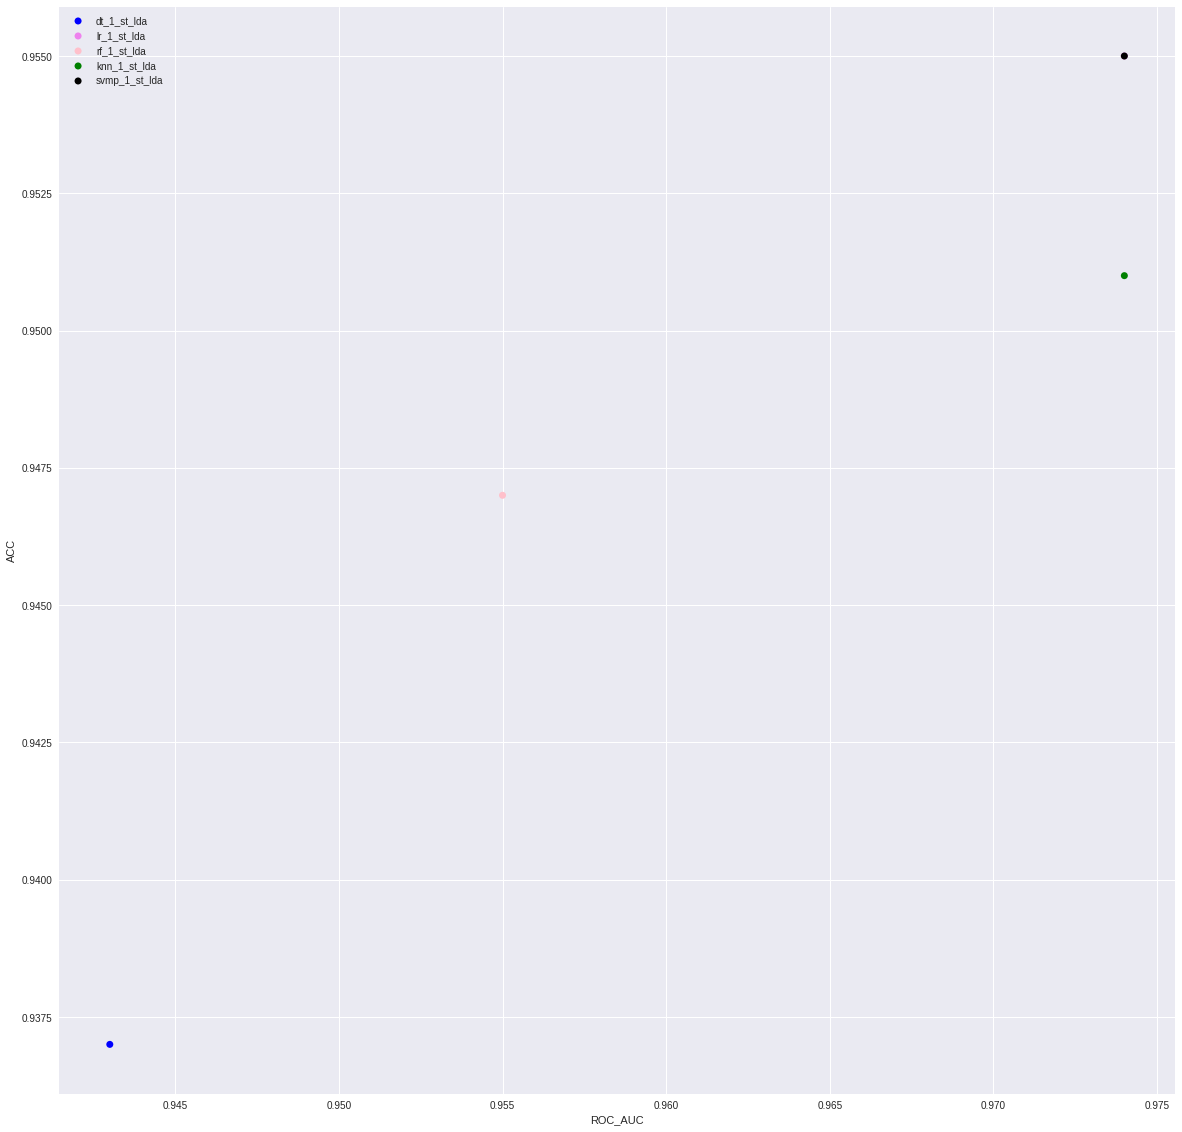

In [124]:
models_labelLDA = [l+'_lda' for l in models_labels2[:-1]]
performance_comparer_plus(X_lda_r, y, models_lda, models_labelLDA)

In [125]:
from Models.functions.learning_curve import learning_curves_describe

In [126]:
_sc = StandardScaler()

In [133]:
_lda = LinearDiscriminantAnalysis()
log_regress_lda_model = Pipeline([
    ('std_scaler', _sc),
    ('lda', _lda),
    ('regressor', LogisticRegression(max_iter=10000, solver='liblinear'))
])

svml_lda_model = Pipeline([
    ('std_scaler', _sc),
    ('lda', _lda),
    ('regressor',  SVC(kernel='linear', probability=True))
])

svmp_lda_model = Pipeline([
    ('std_scaler', _sc),
    ('lda', _lda),
    ('regressor',  SVC(kernel='poly', probability=True))
])

svmr_lda_model = Pipeline([
    ('std_scaler', _sc),
    ('lda', _lda),
    ('regressor',  SVC(kernel='rbf', probability=True))
])

dte3_lda_model = Pipeline([
    ('std_scaler', _sc),
    ('lda', _lda),
    ('regressor',  DecisionTreeClassifier(criterion='entropy', max_depth=3))
])

dtg3_lda_model = Pipeline([
    ('std_scaler', _sc),
    ('lda', _lda),
    ('regressor',  DecisionTreeClassifier(criterion='gini', max_depth=3))
])

In [134]:
from Models.functions.metrics import train_with_cv

In [135]:
pca = PCA()
pca.fit(X_st)

PCA()

In [136]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 44.05329049  67.43614924  81.635928    88.17330079  91.96115486
  94.91784577  96.95717167  98.62079416  99.82519017 100.        ]



Text(0, 0.5, 'Explained variance (%)')

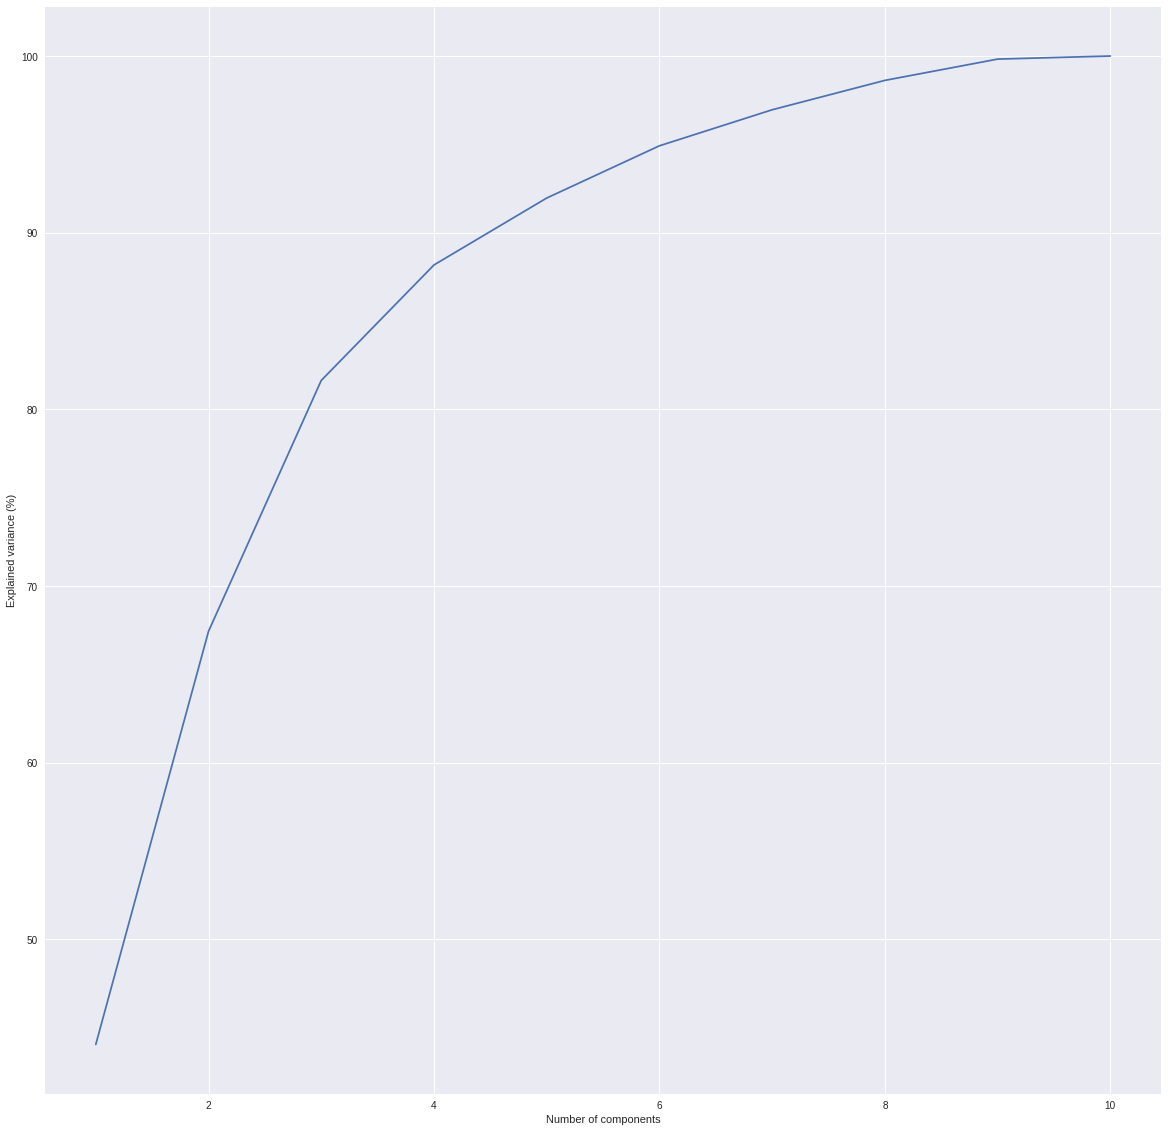

In [137]:
# plot a scree plot
components = None
components = len(pca.explained_variance_ratio_) if components is None else components
plt.plot(range(1,components+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Cumulative Variances (Percentage):
[44.05329049 67.43614924 81.635928   88.17330079 91.96115486]
Number of components: 5


Text(0, 0.5, 'Explained variance (%)')

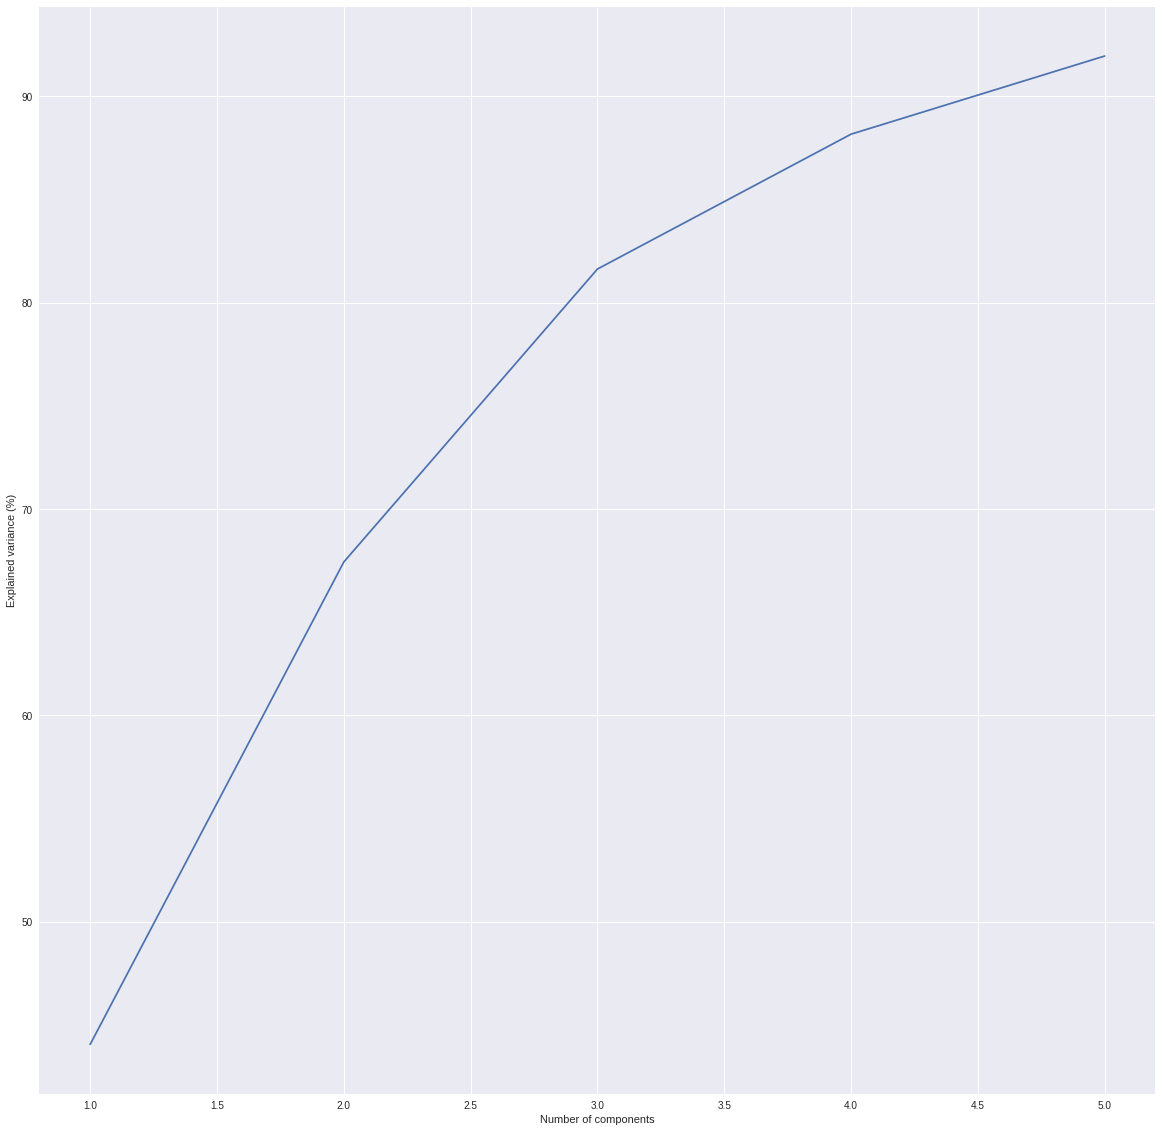

In [138]:
pca = PCA(n_components = 0.9)
pca.fit(X_st)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [139]:
X_pca = pca.transform(X_st)
X_pca.shape

(459, 5)

In [140]:
dt_pca_params = {'criterion':['gini','entropy'], 'max_depth':[3,4]}
dt_pca_clf = model_parameter_optimization(DecisionTreeClassifier(), dt_pca_params, X_pca, y, refit=True)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'entropy', 'max_depth': 3} : 0.9270146520146519 roc_auc


In [141]:
lr_pca_params = {'penalty':['l1','l2'], 'C':np.arange(1,5,0.2), 'max_iter':np.arange(100, 1200, 500)}
lr_pca_clf = model_parameter_optimization(LogisticRegression(solver='liblinear'), lr_pca_params, X_pca, np.ravel(y), refit=True)


Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 2.3999999999999995, 'max_iter': 100, 'penalty': 'l2'} : 0.9902930402930402 roc_auc


In [142]:
rf_pca_params = {'n_estimators':[3,4,5,6,7,8]}
rf_pca_clf = model_parameter_optimization(RandomForestClassifier(criterion='entropy', max_depth=3), rf_pca_params, X_pca, np.ravel(y), refit=True)


Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'n_estimators': 6} : 0.9515567765567764 roc_auc


In [143]:
knn_pca_params = {'n_neighbors':np.arange(10,100)}
knn_pca_clf = model_parameter_optimization(KNeighborsClassifier(), knn_pca_params, X_pca, np.ravel(y),refit=True)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'n_neighbors': 70} : 0.9730311355311354 roc_auc


In [144]:
svmp_pca_params = {'degree':np.arange(1,4), 'C':np.arange(1,5.6,0.5)}
svmp_pca_clf = model_parameter_optimization(SVC(kernel='poly',probability=True), svmp_pca_params, X_pca, np.ravel(y), cv=20,refit=True)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 3.0, 'degree': 1} : 0.9913095238095238 roc_auc


In [145]:
svmr_pca_params = {'C':np.arange(1,10,1)}
svmr_pca_clf = model_parameter_optimization(SVC(kernel='rbf',probability=True), svmr_pca_params, X_pca, np.ravel(y), cv=20,refit=True)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 2} : 0.9658928571428573 roc_auc


In [146]:
models_pca = [dt_pca_clf,lr_pca_clf, rf_pca_clf, knn_pca_clf, svmp_pca_clf, svmr_pca_clf]

Model : dt_1_st_pca


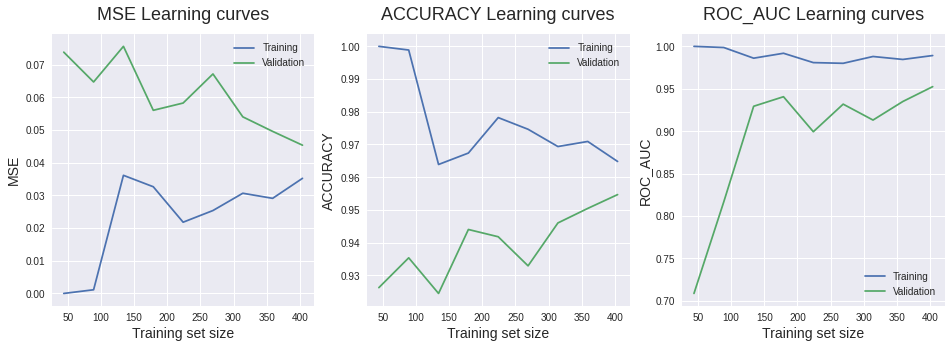

mACC:0.943
mAUC:0.927
<----------------------------------->

Model : lr_1_st_pca


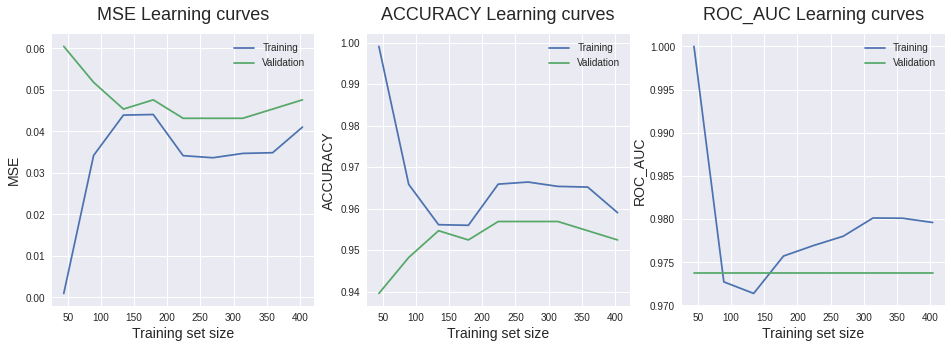

mACC:0.956
mAUC:0.974
<----------------------------------->

Model : rf_1_st_pca


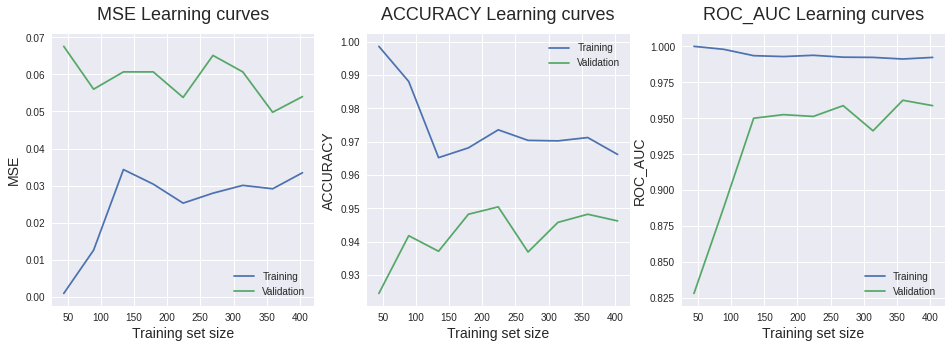

mACC:0.944
mAUC:0.954
<----------------------------------->

Model : knn_1_st_pca


/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/Belzico/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py", line 219, in predict
    neigh

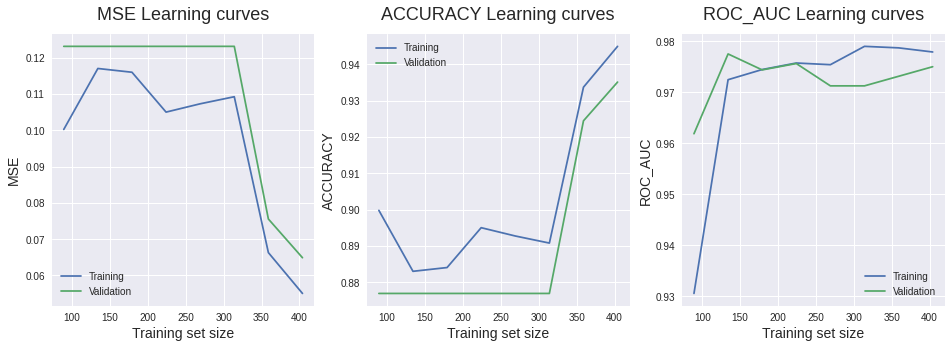

mACC:0.893
mAUC:0.972
<----------------------------------->

Model : svmp_1_st_pca


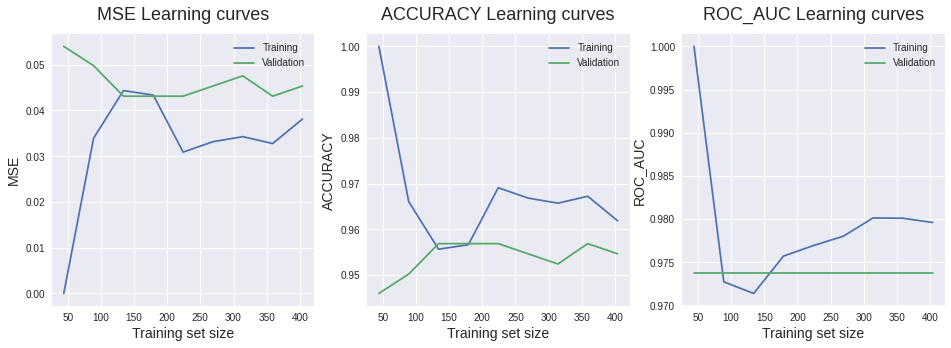

mACC:0.955
mAUC:0.974
<----------------------------------->

Model : svmr_1_st_pca


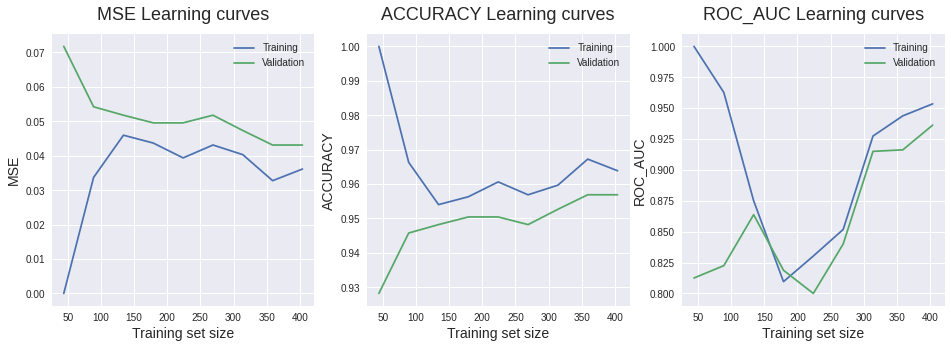

mACC:0.953
mAUC:0.89
<----------------------------------->



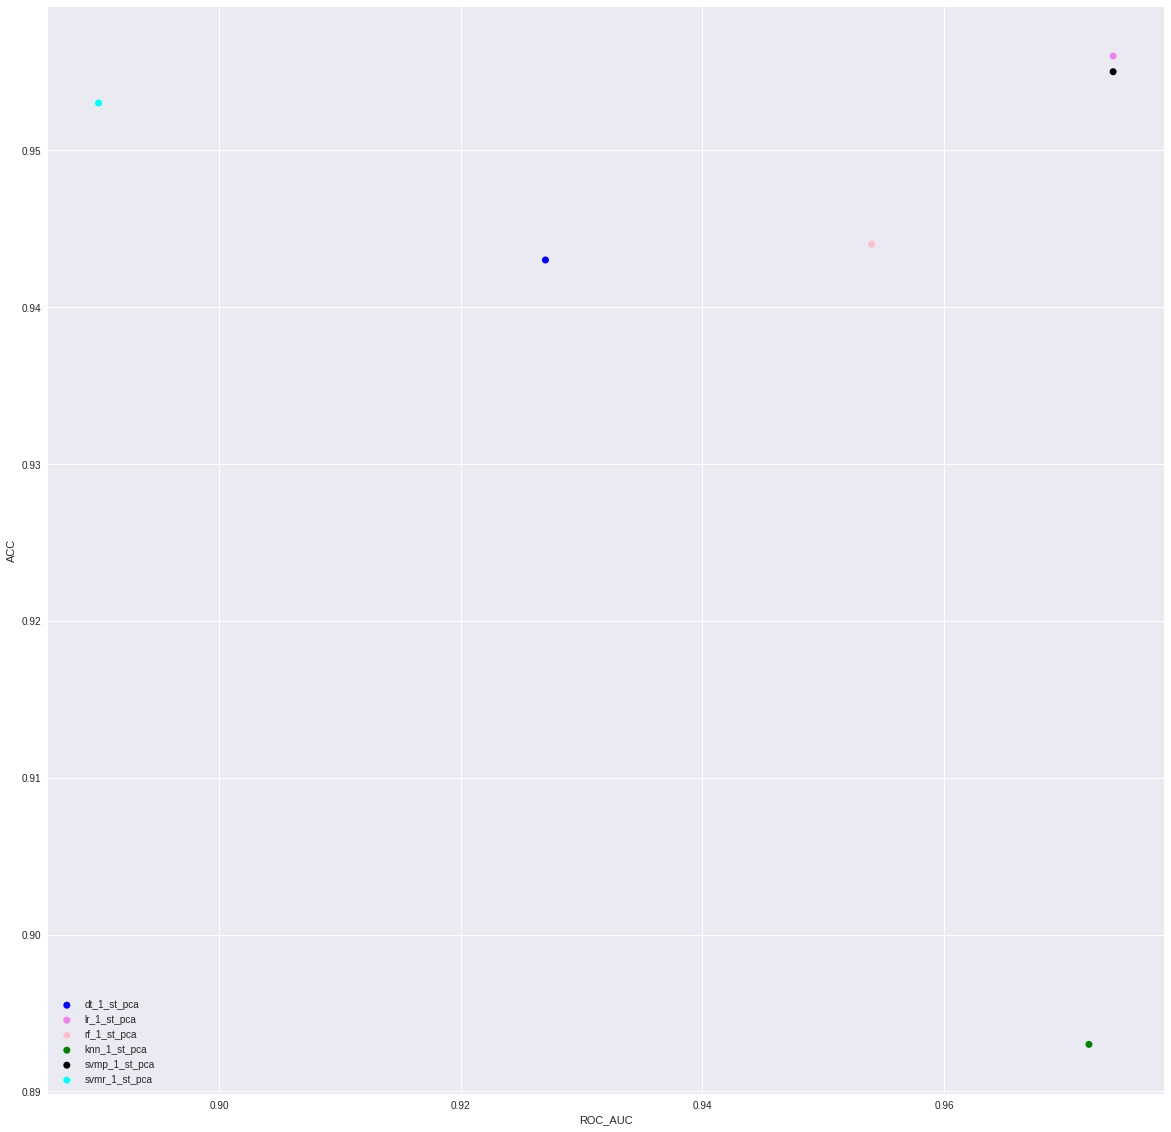

In [147]:
models_labelPCA = [l+'_pca' for l in models_labels2]
performance_comparer_plus(X_lda_r, y, models_pca, models_labelPCA)

In [148]:
from sklearn.pipeline import Pipeline
_sc = StandardScaler()

In [149]:
_pca = PCA(n_components = components)
_model =  LogisticRegression(solver='liblinear', C=1.0, max_iter=100, penalty='l2')
log_reg_pca_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
log_regress_pca_model.fit(X_train,y_train)
log_regress_lda_model.fit(X_train,y_train)
svml_lda_model.fit(X_train,y_train)
svmr_lda_model.fit(X_train,y_train)
svmp_lda_model.fit(X_train,y_train)
dtg3_lda_model.fit(X_train,y_train)
dte3_lda_model.fit(X_train,y_train)

NameError: name 'log_regress_pca_model' is not defined

In [152]:
mayor_league_condition = {
    'play_in_mayors':[1]
}
test_gt_condition = {
    'WAR_pt':10,
    "total_seasons":10,
    'retirament_decade':2010
}

recent_retirement_df = filter_dataset(inactive_pit_df, mayor_league_condition, test_gt_condition, None, None)

In [153]:
recent_retirement_df.shape

(137, 60)

In [154]:
X_unused_test = recent_retirement_df[reduced_features]
y_unused_test = recent_retirement_df["HoF"]

In [156]:
print(f"log_regress_pca_model: {log_regress_pca_model.score(X_unused_test, y_unused_test)}") 
print(f"log_regress_lda_model: {log_regress_lda_model.score(X_unused_test, y_unused_test)}") 
print(f"svml_lda_model: {svml_lda_model.score(X_unused_test, y_unused_test)}") 
print(f"svmr_lda_model: {svmr_lda_model.score(X_unused_test, y_unused_test)}") 
print(f"svmp_lda_model: {svmp_lda_model.score(X_unused_test, y_unused_test)}") 
print(f"dtg3_lda_model: {dtg3_lda_model.score(X_unused_test, y_unused_test)}") 
print(f"dte3_lda_model: {dte3_lda_model.score(X_unused_test, y_unused_test)}") 


NameError: name 'log_regress_pca_model' is not defined

In [ ]:
def compute_prediction(model,X_u, y_u):
    computes = []
    for i in range(len(X_u)):
        p_pred = model.predict_proba(X_u.iloc[i].to_numpy().reshape(1,-1))
        hof = y_u.iloc[i]
        computes.append((recent_retirement_df.iloc[i]['Name'],round(p_pred[0][1],3),hof))
    computes.sort(key= lambda x: x[1], reverse=True)
    return computes
        #print(f"{test_df.iloc[i]['Name']} ---->  HOF_proba: {round(p_pred[0][1],3)} <----- real Hof status:{hof}")

In [ ]:
def print_filter_result(table,proba=0.5):
    for p in table:
        if p[1] >= proba or p[2] == 1:
            print(p)
    return
            

In [ ]:
import pickle
def pickle_save(path, model):
    with open(path, 'wb') as file:
        pickle.dump(model, file)
    return

In [ ]:
print_filter_result(compute_prediction_test(log_regress_pca_model, X_unused_test, y_unused_test))
path = 'trained_models/log_regress_pca_model.pkl'
pickle_save(path, log_regress_pca_model)

In [ ]:
print_filter_result(compute_prediction_test(log_regress_lda_model, X_unused_test, y_unused_test))
path = 'trained_models/log_regress_lda_model.pkl'
pickle_save(path, log_regress_lda_model)

In [ ]:
print_filter_result(compute_prediction_test(svml_lda_model, X_unused_test, y_unused_test))

In [ ]:
print_filter_result(compute_prediction_test(svmp_lda_model, X_unused_test, y_unused_test))
path = 'trained_models/svmp_lda_model.pkl'
pickle_save(path, svmp_lda_model)

In [ ]:
print_filter_result(compute_prediction_test(dtg3_lda_model, X_unused_test, y_unused_test))
path = 'trained_models/dtg3_lda_model.pkl'
pickle_save(path, dtg3_lda_model)

In [ ]:
print_filter_result(compute_prediction_test(dte3_lda_model, X_unused_test, y_unused_test))
path = 'trained_models/dte3_lda_model.pkl'
pickle_save(path, dte3_lda_model)